In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e9/sample_submission.csv
/kaggle/input/playground-series-s5e9/train.csv
/kaggle/input/playground-series-s5e9/test.csv


In [30]:
train=pd.read_csv('/kaggle/input/playground-series-s5e9/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s5e9/test.csv')

In [31]:
train.head(5)

id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0   0     0.603610      -7.636942      0.023500         0.000005   
1   1     0.639451     -16.267598      0.071520         0.444929   
2   2     0.514538     -15.953575      0.110715         0.173699   
3   3     0.734463      -1.357000      0.052965         0.001651   
4   4     0.532968     -13.056437      0.023500         0.068687   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.000001                   0.051385   0.409866      290715.6450   
1           0.349414                   0.170522   0.651010      164519.5174   
2           0.453814                   0.029576   0.423865      174495.5667   
3           0.159717                   0.086366   0.278745      225567.4651   
4           0.000001                   0.331345   0.477769      213960.6789   

     Energy  BeatsPerMinute  
0  0.826267       147.53020  
1  0.145400       136.15963  
2  0.624667        55.31989  
3  0.487467       147.91212  
4  0.947333        89.58511

In [32]:
test.head(5)

id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0  524164     0.410013     -16.794967      0.023500         0.232910   
1  524165     0.463071      -1.357000      0.141818         0.057725   
2  524166     0.686569      -3.368928      0.167851         0.287823   
3  524167     0.885793      -5.598049      0.118488         0.000005   
4  524168     0.637391      -7.068160      0.126099         0.539073   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.012689                   0.271585   0.664321      302901.5498   
1           0.257942                   0.097624   0.829552      221995.6643   
2           0.210915                   0.325909   0.304978      357724.0127   
3           0.376906                   0.134435   0.487740      271790.3989   
4           0.068950                   0.024300   0.591248      277728.5383   

     Energy  
0  0.424867  
1  0.846000  
2  0.134067  
3  0.316467  
4  0.481067

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174722 entries, 0 to 174721
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         174722 non-null  int64  
 1   RhythmScore                174722 non-null  float64
 2   AudioLoudness              174722 non-null  float64
 3   VocalContent               174722 non-null  float64
 4   AcousticQuality            174722 non-null  float64
 5   InstrumentalScore          174722 non-null  float64
 6   LivePerformanceLikelihood  174722 non-null  float64
 7   MoodScore                  174722 non-null  float64
 8   TrackDurationMs            174722 non-null  float64
 9   Energy                     174722 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 13.3 MB


In [35]:
train.isnull().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

In [36]:
test.isnull().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
dtype: int64

In [37]:
train.dtypes

id                             int64
RhythmScore                  float64
AudioLoudness                float64
VocalContent                 float64
AcousticQuality              float64
InstrumentalScore            float64
LivePerformanceLikelihood    float64
MoodScore                    float64
TrackDurationMs              float64
Energy                       float64
BeatsPerMinute               float64
dtype: object

In [38]:
train.describe()

id    RhythmScore  AudioLoudness   VocalContent  \
count  524164.000000  524164.000000  524164.000000  524164.000000   
mean   262081.500000       0.632843      -8.379014       0.074443   
std    151313.257586       0.156899       4.616221       0.049939   
min         0.000000       0.076900     -27.509725       0.023500   
25%    131040.750000       0.515850     -11.551933       0.023500   
50%    262081.500000       0.634686      -8.252499       0.066425   
75%    393122.250000       0.739179      -4.912298       0.107343   
max    524163.000000       0.975000      -1.357000       0.256401   

       AcousticQuality  InstrumentalScore  LivePerformanceLikelihood  \
count    524164.000000      524164.000000              524164.000000   
mean          0.262913           0.117690                   0.178398   
std           0.223120           0.131845                   0.118186   
min           0.000005           0.000001                   0.024300   
25%           0.069413           0.000001                   0.077637   
50%           0.242502           0.074247                   0.166327   
75%           0.396957           0.204065                   0.268946   
max           0.995000           0.869258                   0.599924   

           MoodScore  TrackDurationMs         Energy  BeatsPerMinute  
count  524164.000000    524164.000000  524164.000000   524164.000000  
mean        0.555843    241903.692949       0.500923      119.034899  
std         0.225480     59326.601501       0.289952       26.468077  
min         0.025600     63973.000000       0.000067       46.718000  
25%         0.403921    207099.876625       0.254933      101.070410  
50%         0.564817    243684.058150       0.511800      118.747660  
75%         0.716633    281851.658500       0.746000      136.686590  
max         0.978000    464723.228100       1.000000      206.037000

In [39]:
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols

['id',
 'RhythmScore',
 'AudioLoudness',
 'VocalContent',
 'AcousticQuality',
 'InstrumentalScore',
 'LivePerformanceLikelihood',
 'MoodScore',
 'TrackDurationMs',
 'Energy',
 'BeatsPerMinute']

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore, probplot
import scipy.stats as stats  # for probplot, skewness, kurtosis

def analyze_numerical_variables(df, columns=None):
    if columns is None:
        columns = df.select_dtypes(include=np.number).columns
    
    results = {}
    
    for col in columns:
        data = df[col].dropna()
        
        stats_dict = {
            'count': len(data),
            'mean': data.mean(),
            'median': data.median(),
            'std': data.std(),
            'min': data.min(),
            'max': data.max(),
            'q25': data.quantile(0.25),
            'q75': data.quantile(0.75),
            'skewness': data.skew(),
            'kurtosis': data.kurtosis()
        }
        
        # Outlier detection - IQR method
        Q1 = stats_dict['q25']
        Q3 = stats_dict['q75']
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        iqr_outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        # Outlier detection - Z-score method
        z_scores = np.abs(zscore(data))
        zscore_outliers = data[z_scores > 3]
        
        # Print results
        print(f"\n📊 Variable: {col}")
        print(f"Count: {stats_dict['count']:,}")
        print(f"Mean: {stats_dict['mean']:.3f}")
        print(f"Median: {stats_dict['median']:.3f}")
        print(f"Std Dev: {stats_dict['std']:.3f}")
        print(f"Range: {stats_dict['min']:.3f} to {stats_dict['max']:.3f}")
        
        # Distribution shape
        if stats_dict['skewness'] > 0.5:
            skew_desc = "Right-skewed"
        elif stats_dict['skewness'] < -0.5:
            skew_desc = "Left-skewed"
        else:
            skew_desc = "Approximately normal"
            
        print(f"Skewness: {stats_dict['skewness']:.3f} ({skew_desc})")
        print(f"Kurtosis: {stats_dict['kurtosis']:.3f}")
        
        # Outliers
        iqr_pct = (len(iqr_outliers) / len(data)) * 100
        zscore_pct = (len(zscore_outliers) / len(data)) * 100
        
        print(f"IQR Outliers: {len(iqr_outliers)} ({iqr_pct:.1f}%)")
        print(f"Z-score Outliers: {len(zscore_outliers)} ({zscore_pct:.1f}%)")
        
        # Store results
        results[col] = {
            'stats': stats_dict,
            'iqr_outliers': iqr_outliers,
            'zscore_outliers': zscore_outliers,
            'iqr_bounds': (lower_bound, upper_bound)
        }
        
        # Create plots
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        fig.suptitle(f'Distribution Analysis: {col}', fontsize=14, fontweight='bold')
        
        # Histogram
        axes[0,0].hist(data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0,0].set_title('Histogram')
        axes[0,0].set_xlabel(col)
        axes[0,0].set_ylabel('Frequency')
        axes[0,0].grid(True, alpha=0.3)
        
        # Box plot
        box_plot = axes[0,1].boxplot(data, patch_artist=True)
        box_plot['boxes'][0].set_facecolor('lightcoral')
        axes[0,1].set_title('Box Plot')
        axes[0,1].set_ylabel(col)
        axes[0,1].grid(True, alpha=0.3)
        
        # Density plot
        data.plot.kde(ax=axes[1,0], color='green', linewidth=2)
        axes[1,0].set_title('Density Plot')
        axes[1,0].set_xlabel(col)
        axes[1,0].set_ylabel('Density')
        axes[1,0].grid(True, alpha=0.3)
        
        # Q-Q plot
        stats.probplot(data, dist="norm", plot=axes[1,1])
        axes[1,1].set_title('Q-Q Plot')
        axes[1,1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    return results



📊 Variable: id
Count: 524,164
Mean: 262081.500
Median: 262081.500
Std Dev: 151313.258
Range: 0.000 to 524163.000
Skewness: 0.000 (Approximately normal)
Kurtosis: -1.200
IQR Outliers: 0 (0.0%)
Z-score Outliers: 0 (0.0%)


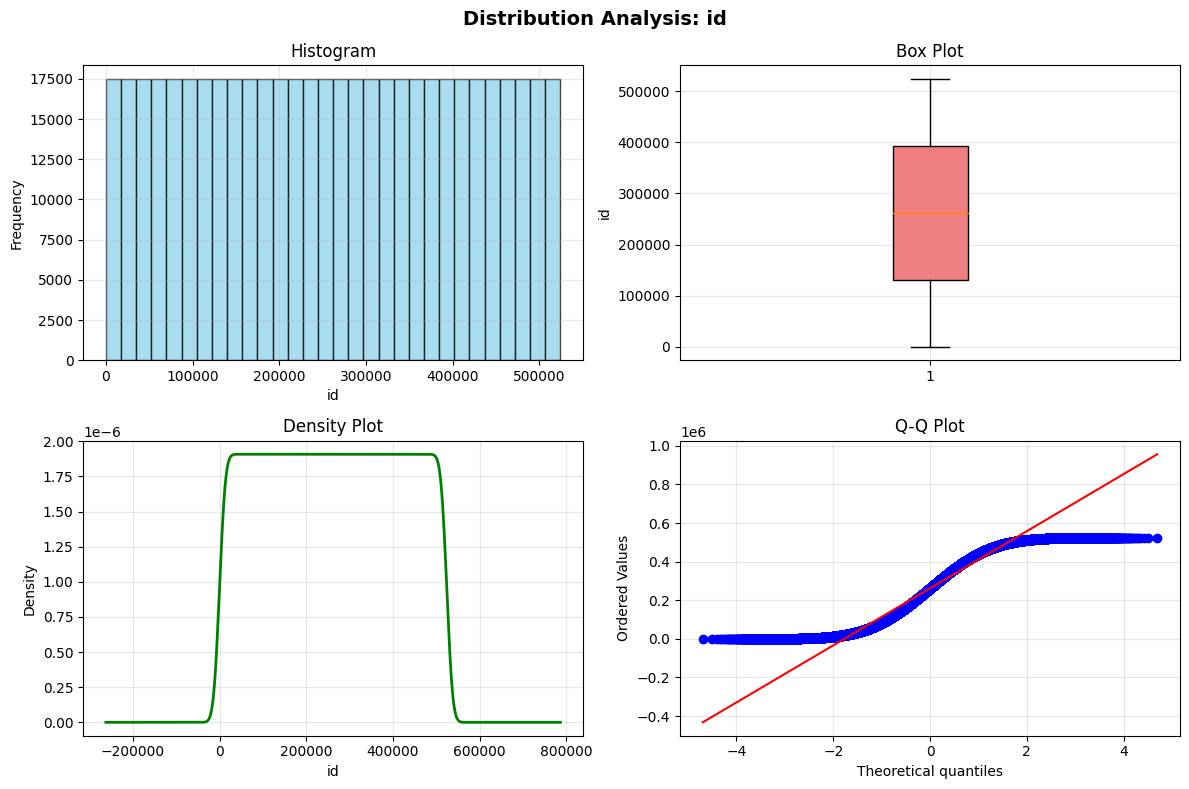


📊 Variable: RhythmScore
Count: 524,164
Mean: 0.633
Median: 0.635
Std Dev: 0.157
Range: 0.077 to 0.975
Skewness: 0.168 (Approximately normal)
Kurtosis: -0.527
IQR Outliers: 8 (0.0%)
Z-score Outliers: 7 (0.0%)


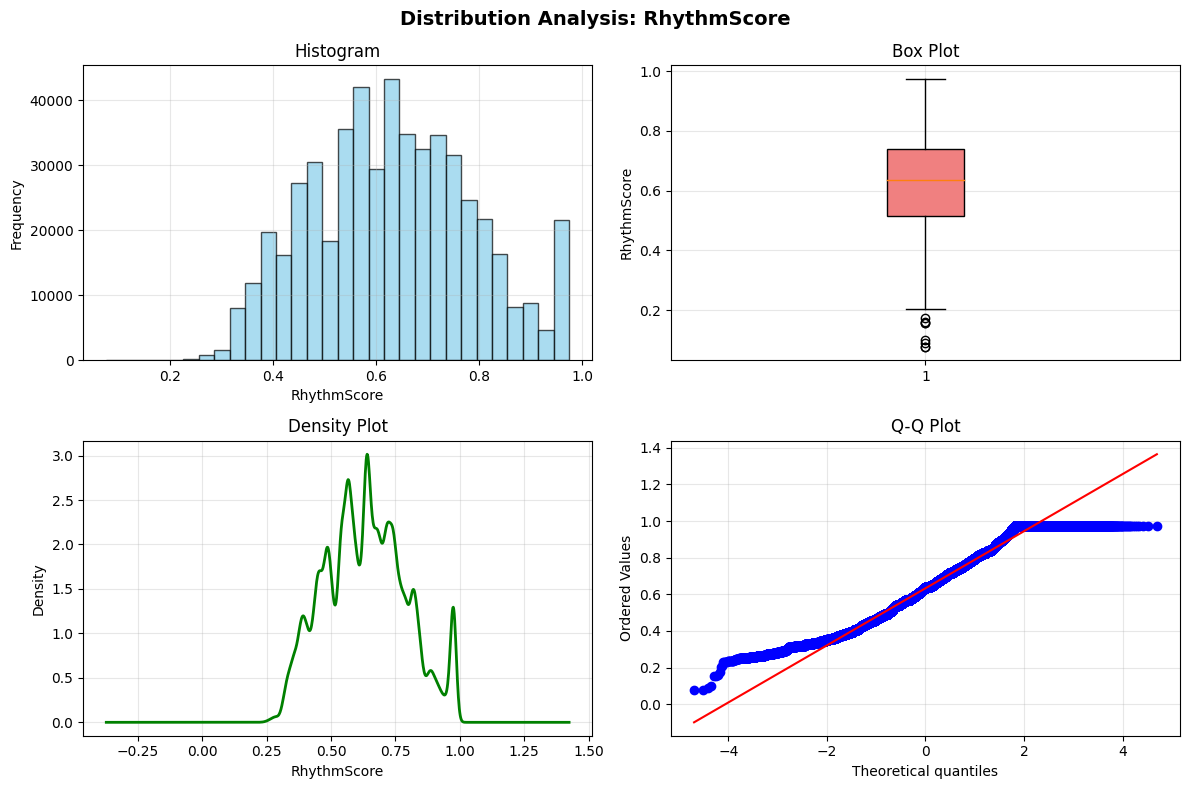


📊 Variable: AudioLoudness
Count: 524,164
Mean: -8.379
Median: -8.252
Std Dev: 4.616
Range: -27.510 to -1.357
Skewness: -0.309 (Approximately normal)
Kurtosis: -0.388
IQR Outliers: 1770 (0.3%)
Z-score Outliers: 1213 (0.2%)


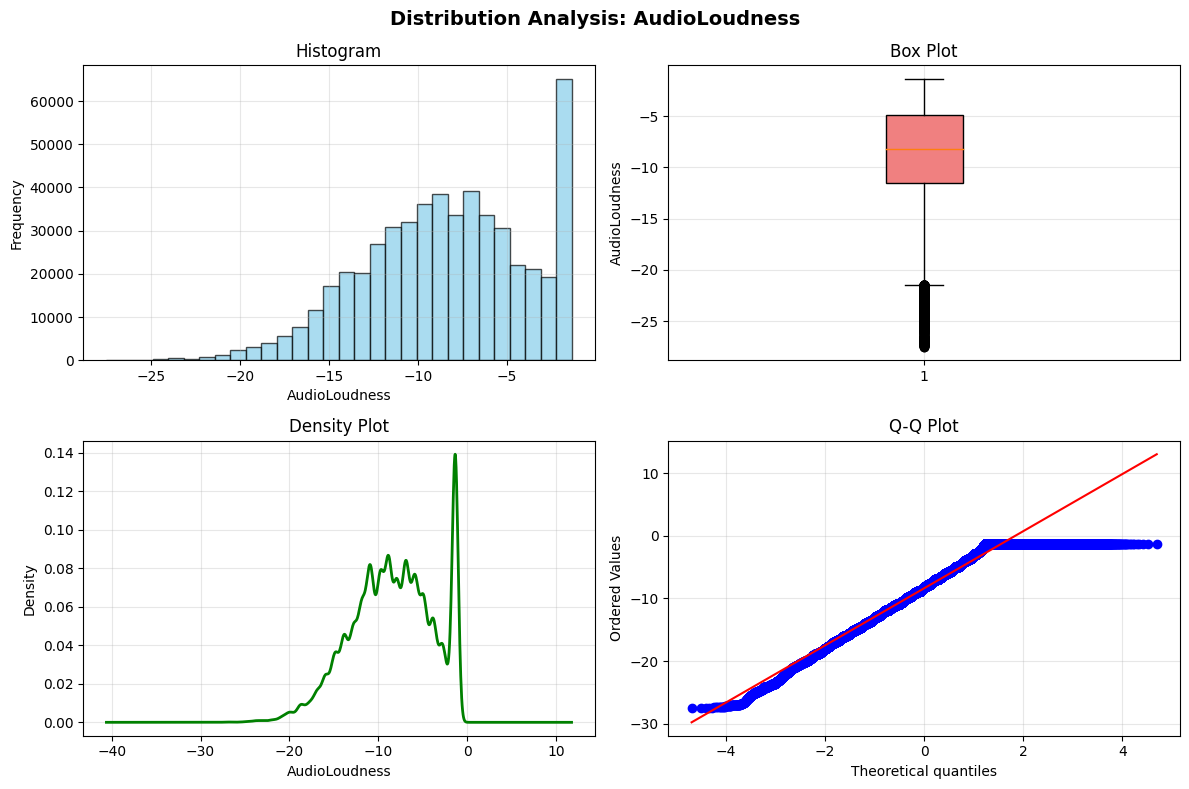


📊 Variable: VocalContent
Count: 524,164
Mean: 0.074
Median: 0.066
Std Dev: 0.050
Range: 0.024 to 0.256
Skewness: 0.789 (Right-skewed)
Kurtosis: -0.148
IQR Outliers: 1245 (0.2%)
Z-score Outliers: 3146 (0.6%)


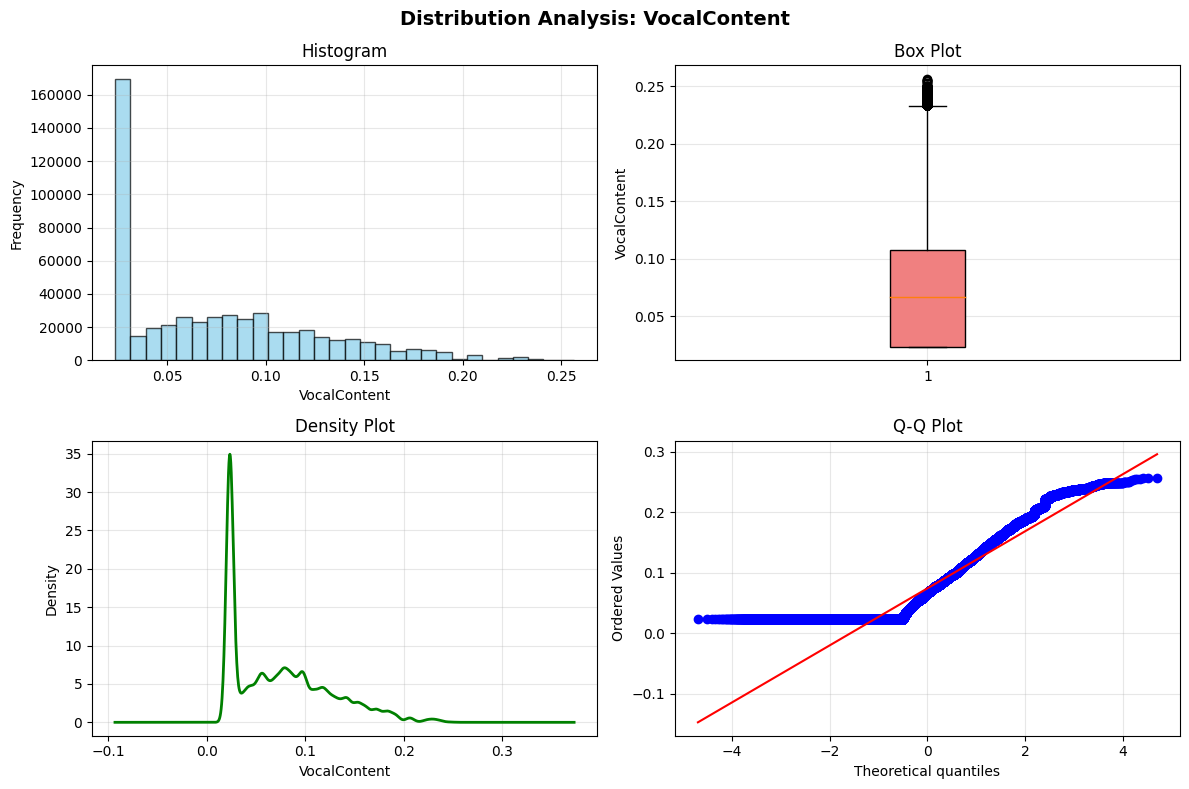


📊 Variable: AcousticQuality
Count: 524,164
Mean: 0.263
Median: 0.243
Std Dev: 0.223
Range: 0.000 to 0.995
Skewness: 0.786 (Right-skewed)
Kurtosis: 0.267
IQR Outliers: 6746 (1.3%)
Z-score Outliers: 6007 (1.1%)


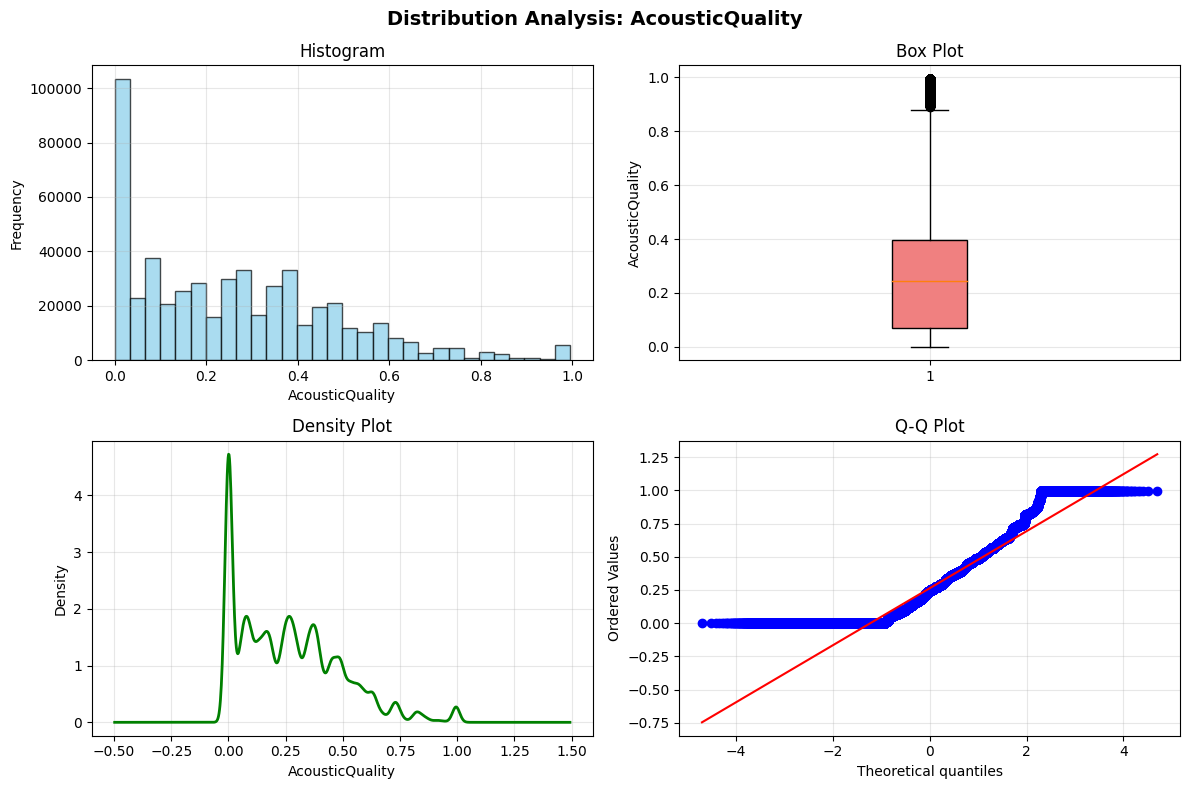


📊 Variable: InstrumentalScore
Count: 524,164
Mean: 0.118
Median: 0.074
Std Dev: 0.132
Range: 0.000 to 0.869
Skewness: 1.036 (Right-skewed)
Kurtosis: 0.156
IQR Outliers: 2845 (0.5%)
Z-score Outliers: 2668 (0.5%)


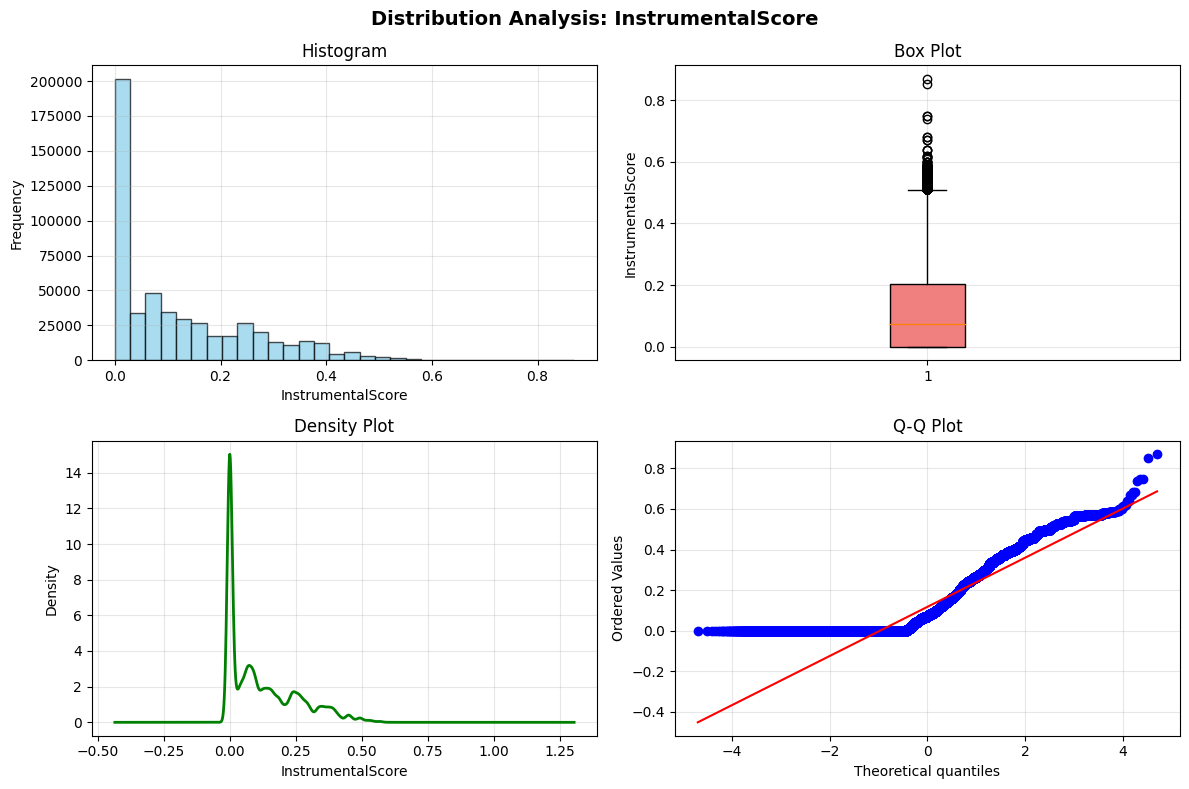


📊 Variable: LivePerformanceLikelihood
Count: 524,164
Mean: 0.178
Median: 0.166
Std Dev: 0.118
Range: 0.024 to 0.600
Skewness: 0.393 (Approximately normal)
Kurtosis: -0.754
IQR Outliers: 129 (0.0%)
Z-score Outliers: 232 (0.0%)


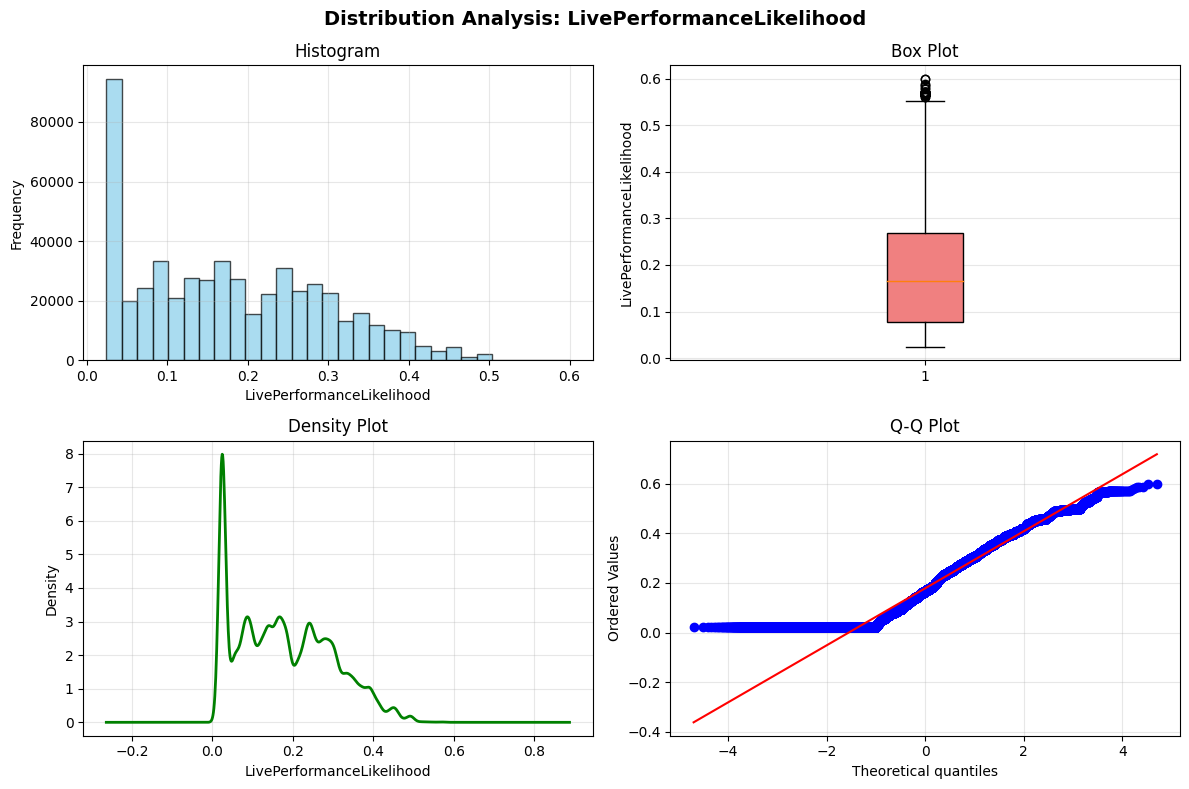


📊 Variable: MoodScore
Count: 524,164
Mean: 0.556
Median: 0.565
Std Dev: 0.225
Range: 0.026 to 0.978
Skewness: -0.269 (Approximately normal)
Kurtosis: -0.142
IQR Outliers: 0 (0.0%)
Z-score Outliers: 0 (0.0%)


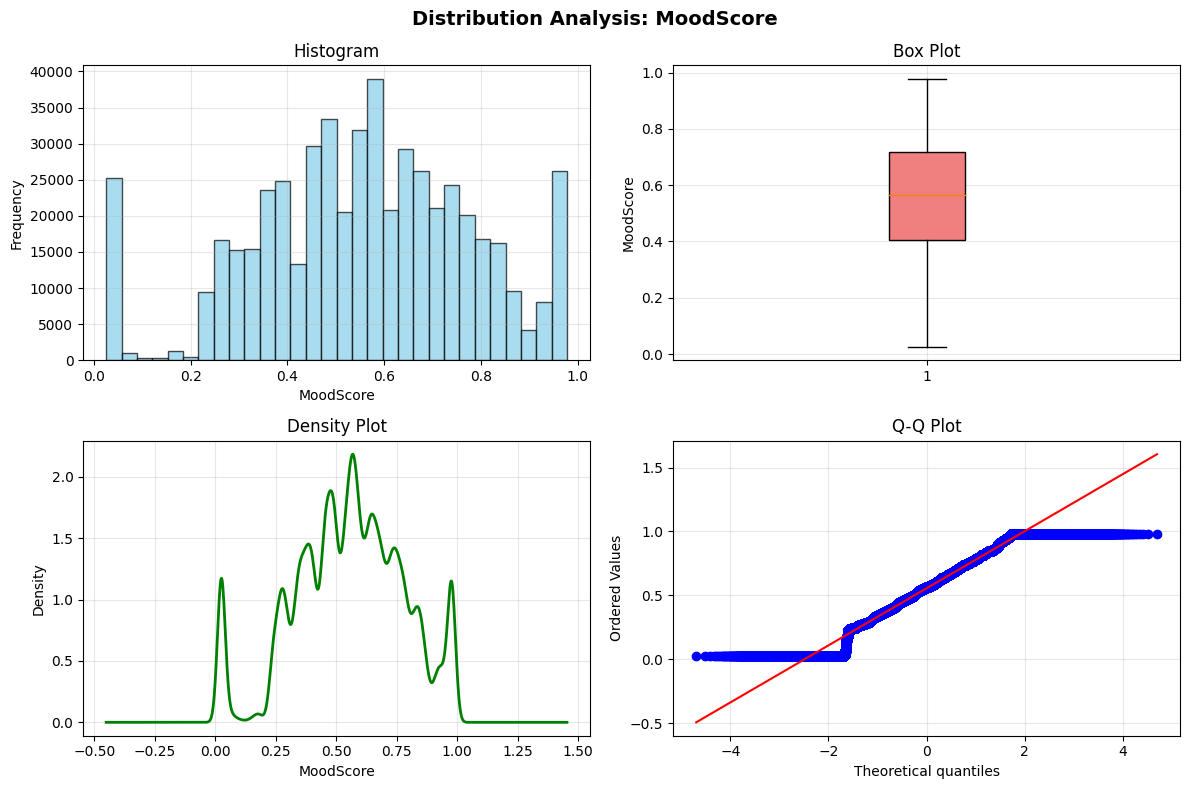


📊 Variable: TrackDurationMs
Count: 524,164
Mean: 241903.693
Median: 243684.058
Std Dev: 59326.602
Range: 63973.000 to 464723.228
Skewness: -0.190 (Approximately normal)
Kurtosis: -0.129
IQR Outliers: 4267 (0.8%)
Z-score Outliers: 23 (0.0%)


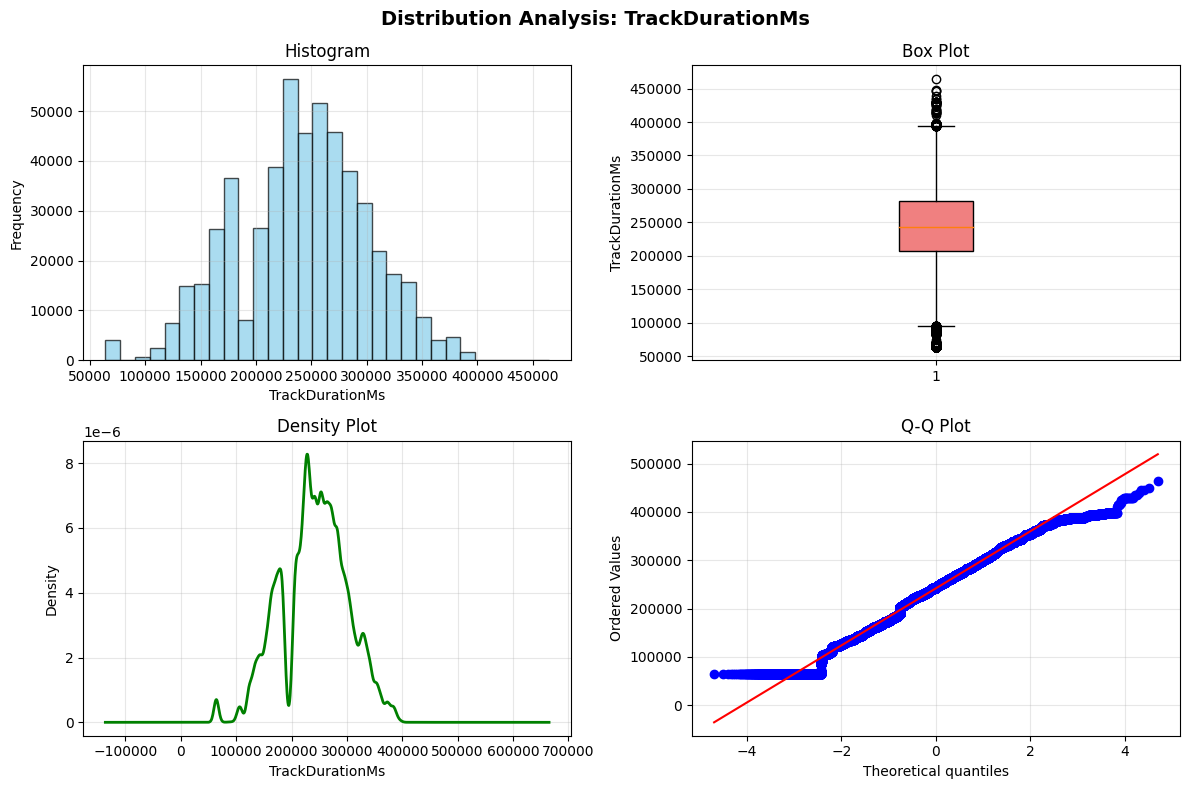


📊 Variable: Energy
Count: 524,164
Mean: 0.501
Median: 0.512
Std Dev: 0.290
Range: 0.000 to 1.000
Skewness: -0.030 (Approximately normal)
Kurtosis: -1.209
IQR Outliers: 0 (0.0%)
Z-score Outliers: 0 (0.0%)


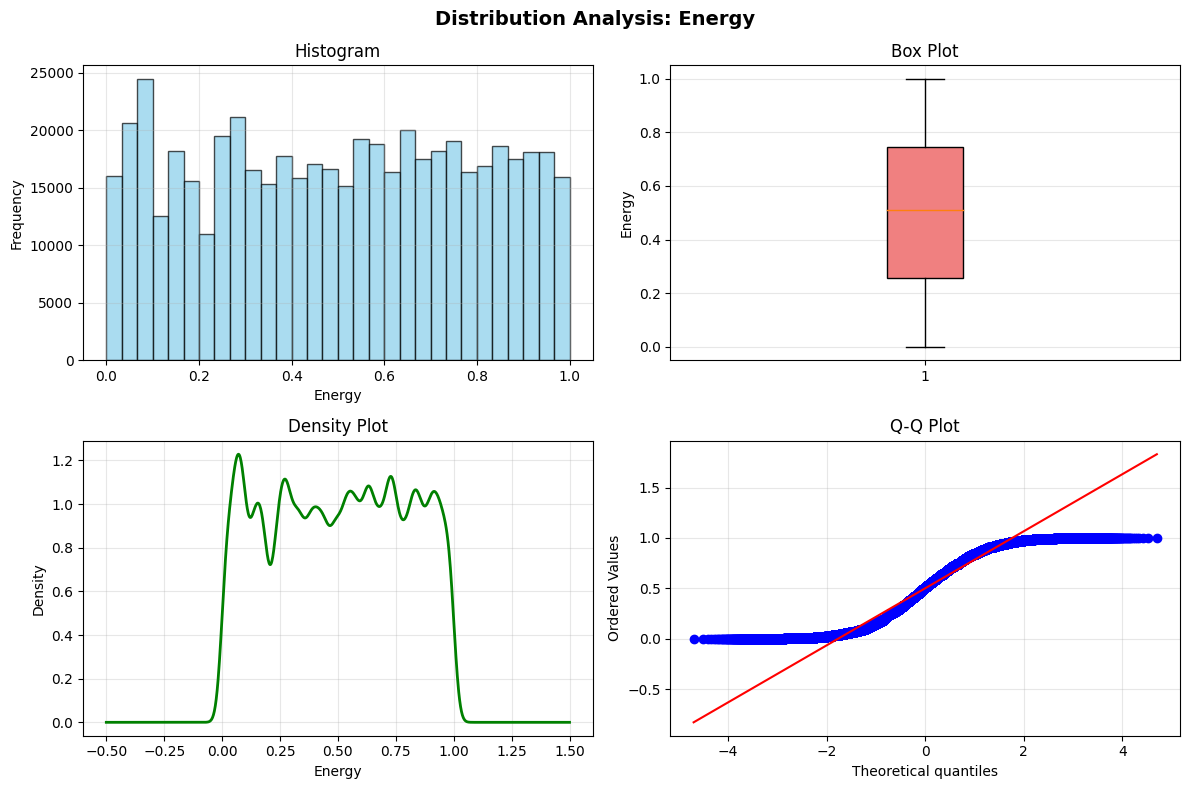


📊 Variable: BeatsPerMinute
Count: 524,164
Mean: 119.035
Median: 118.748
Std Dev: 26.468
Range: 46.718 to 206.037
Skewness: 0.072 (Approximately normal)
Kurtosis: -0.154
IQR Outliers: 2141 (0.4%)
Z-score Outliers: 505 (0.1%)


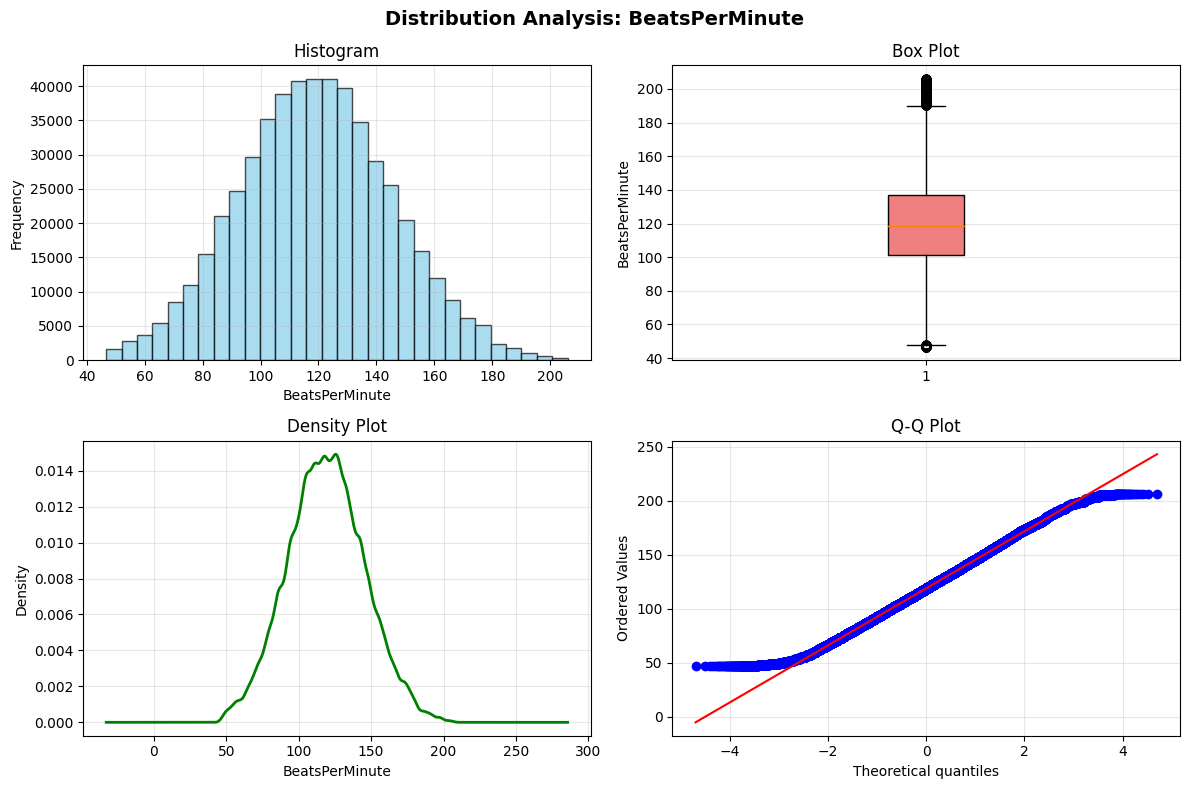

In [44]:
results = analyze_numerical_variables(train)

'id',
 'RhythmScore',
 'AudioLoudness',
 'VocalContent',
 'AcousticQuality',
 'InstrumentalScore',
 'LivePerformanceLikelihood',
 'MoodScore',
 'TrackDurationMs',
 'Energy',
 'BeatsPerMinute'

## 

In [45]:
import numpy as np
import pandas as pd

def skew_categories(df: pd.DataFrame, normal_thresh: float = 0.5) -> pd.DataFrame:
    # compute sample skewness per column (NaNs -> 0 for constant cols)
    sk = df.select_dtypes(include='number').skew().fillna(0.0)

    def label(v: float) -> str:
        if v > normal_thresh:
            return "right"
        elif v < -normal_thresh:
            return "left"
        else:
            return "normal"

    out = pd.DataFrame({
        "skew": sk,
        "category": sk.apply(label)
    }).sort_index()

    return out


In [47]:
skewed_col=['AcousticQuality','InstrumentalScore','VocalContent']

In [49]:
from sklearn.preprocessing import PowerTransformer
def transform_columns(df: pd.DataFrame, cols: list[str], shifts: pd.Series | None = None):
    """
    Apply log1p to selected columns, adding the minimal shift so each col >= 0.
    Returns a transformed copy and the per-column shifts used.
    """
    X = df.copy()
    pt = PowerTransformer(method="yeo-johnson")

    X[cols_to_transform] = pt.fit_transform(X[cols_to_transform])
    return X

# ---- usage ----
cols_to_transform = ['AcousticQuality','InstrumentalScore','VocalContent']

# Train
train_transform= transform_columns(train, cols_to_transform)

In [50]:
print("After transform skew:",train_transform[cols_to_transform].skew())

After transform skew: AcousticQuality      0.074226
InstrumentalScore    0.280883
VocalContent         0.175811
dtype: float64


In [50]:
print("After transform skew:",train_transform[cols_to_transform].skew())

After transform skew: AcousticQuality      0.074226
InstrumentalScore    0.280883
VocalContent         0.175811
dtype: float64


In [ ]:
results_transform=analyze_numerical_variables(train_transform)
results_transform

In [51]:
from sklearn.preprocessing import StandardScaler
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()

# Apply standardization
scaler = StandardScaler()
train_scaled = pd.DataFrame(
    scaler.fit_transform(train_transform[numerical_cols]), 
    columns=numerical_cols, 
    index=train.index
)

In [52]:
skewness=skew_categories(train_scaled)
skewness

skew category
AcousticQuality            7.422560e-02   normal
AudioLoudness             -3.085136e-01   normal
BeatsPerMinute             7.154987e-02   normal
Energy                    -3.034354e-02   normal
InstrumentalScore          2.808832e-01   normal
LivePerformanceLikelihood  3.933217e-01   normal
MoodScore                 -2.688198e-01   normal
RhythmScore                1.681546e-01   normal
TrackDurationMs           -1.904829e-01   normal
VocalContent               1.758110e-01   normal
id                         6.662933e-16   normal


📊 Variable: id
Count: 524,164
Mean: -0.000
Median: 0.000
Std Dev: 1.000
Range: -1.732 to 1.732
Skewness: 0.000 (Approximately normal)
Kurtosis: -1.200
IQR Outliers: 0 (0.0%)
Z-score Outliers: 0 (0.0%)


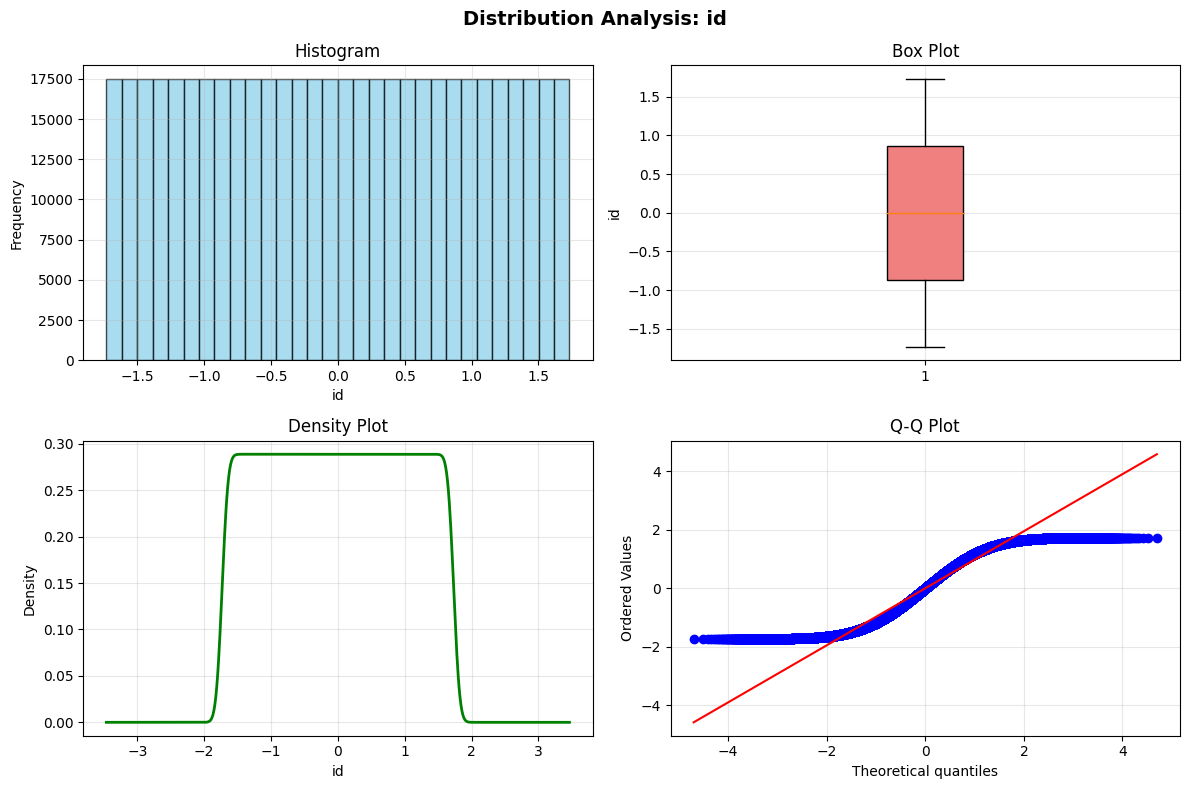


📊 Variable: RhythmScore
Count: 524,164
Mean: 0.000
Median: 0.012
Std Dev: 1.000
Range: -3.543 to 2.181
Skewness: 0.168 (Approximately normal)
Kurtosis: -0.527
IQR Outliers: 8 (0.0%)
Z-score Outliers: 7 (0.0%)


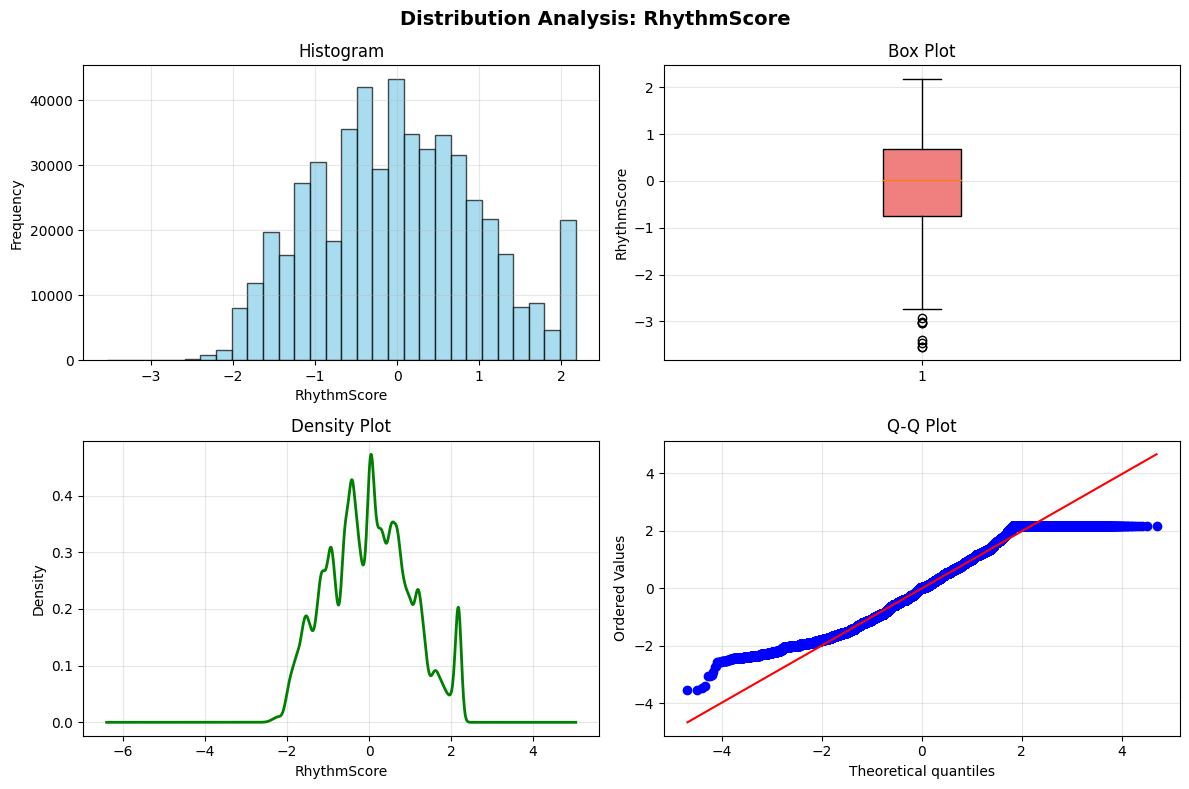


📊 Variable: AudioLoudness
Count: 524,164
Mean: -0.000
Median: 0.027
Std Dev: 1.000
Range: -4.144 to 1.521
Skewness: -0.309 (Approximately normal)
Kurtosis: -0.388
IQR Outliers: 1770 (0.3%)
Z-score Outliers: 1213 (0.2%)


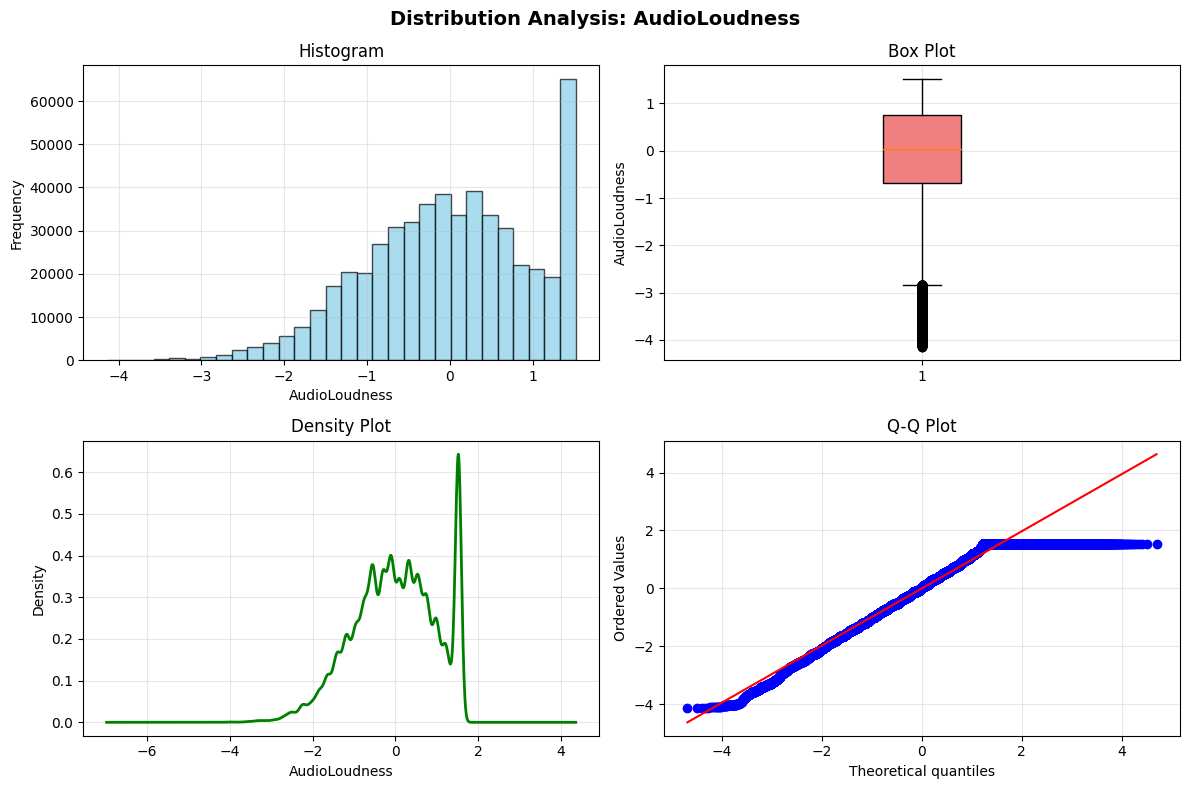


📊 Variable: VocalContent
Count: 524,164
Mean: -0.000
Median: 0.046
Std Dev: 1.000
Range: -1.177 to 2.198
Skewness: 0.176 (Approximately normal)
Kurtosis: -1.308
IQR Outliers: 0 (0.0%)
Z-score Outliers: 0 (0.0%)


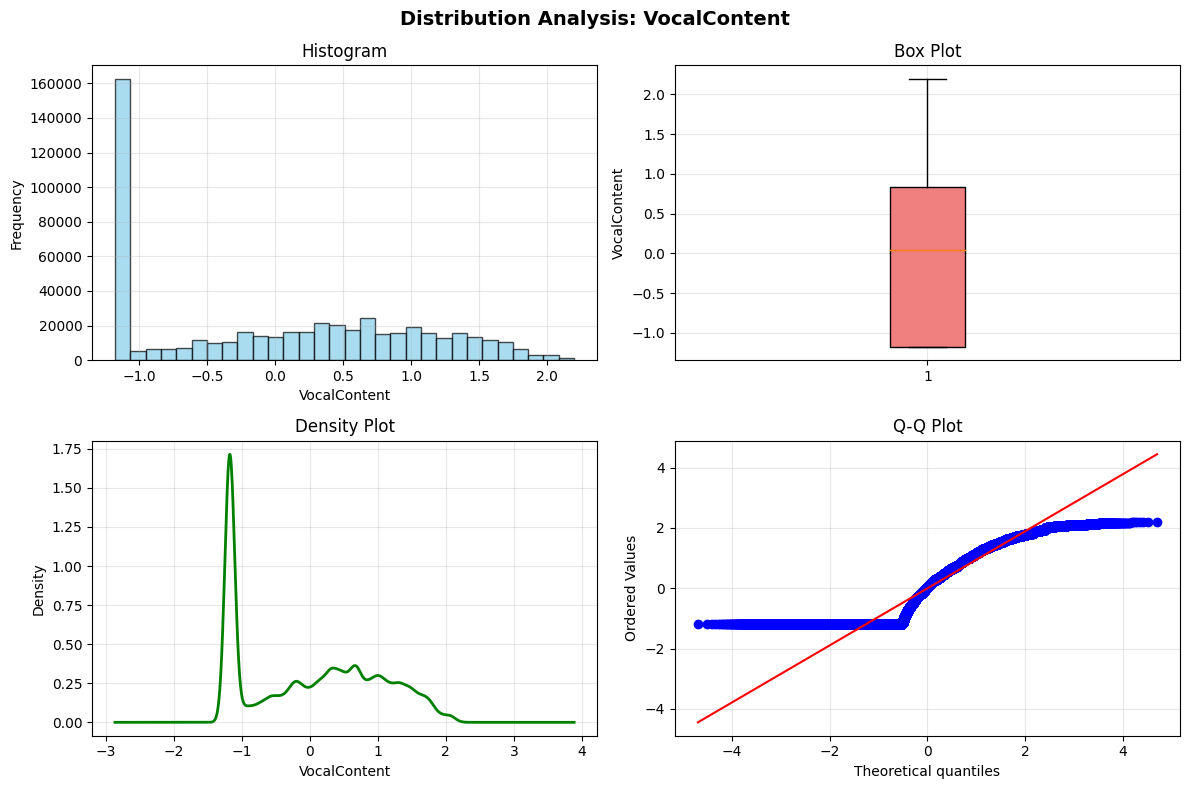


📊 Variable: AcousticQuality
Count: 524,164
Mean: 0.000
Median: 0.099
Std Dev: 1.000
Range: -1.408 to 2.242
Skewness: 0.074 (Approximately normal)
Kurtosis: -1.059
IQR Outliers: 0 (0.0%)
Z-score Outliers: 0 (0.0%)


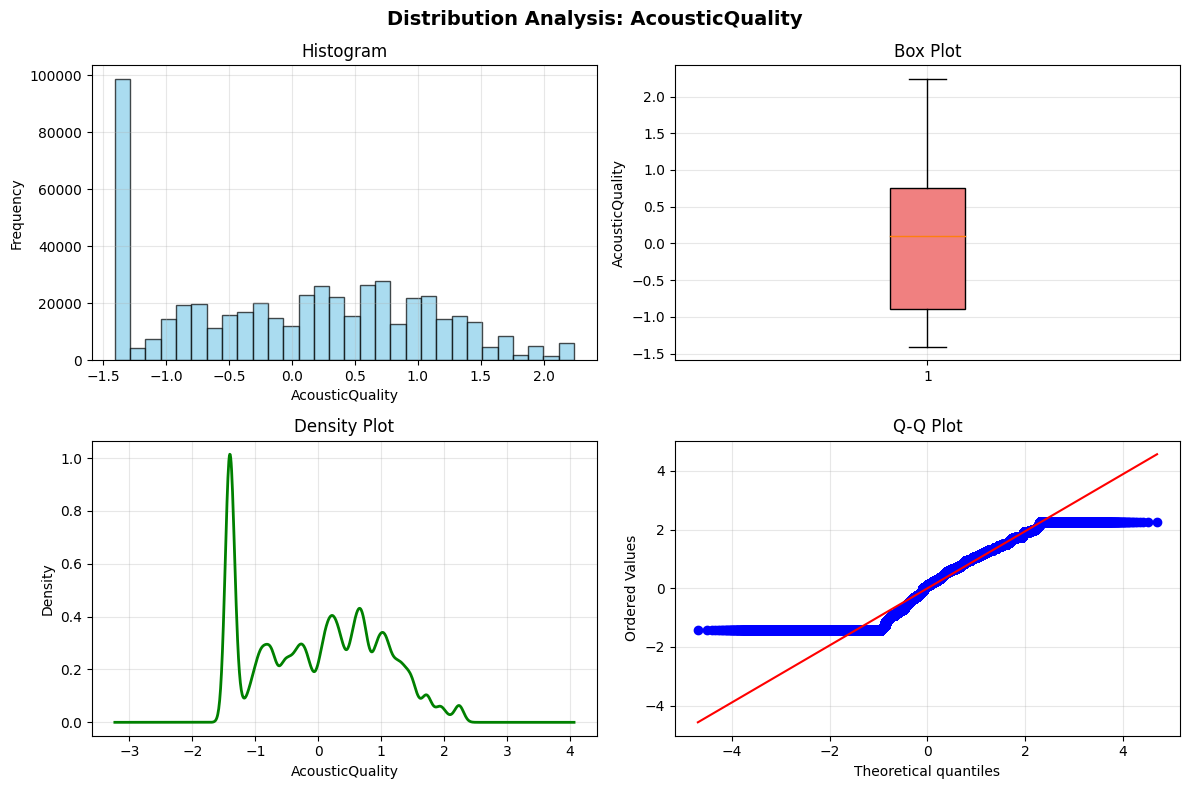


📊 Variable: InstrumentalScore
Count: 524,164
Mean: -0.000
Median: -0.078
Std Dev: 1.000
Range: -1.090 to 2.130
Skewness: 0.281 (Approximately normal)
Kurtosis: -1.394
IQR Outliers: 0 (0.0%)
Z-score Outliers: 0 (0.0%)


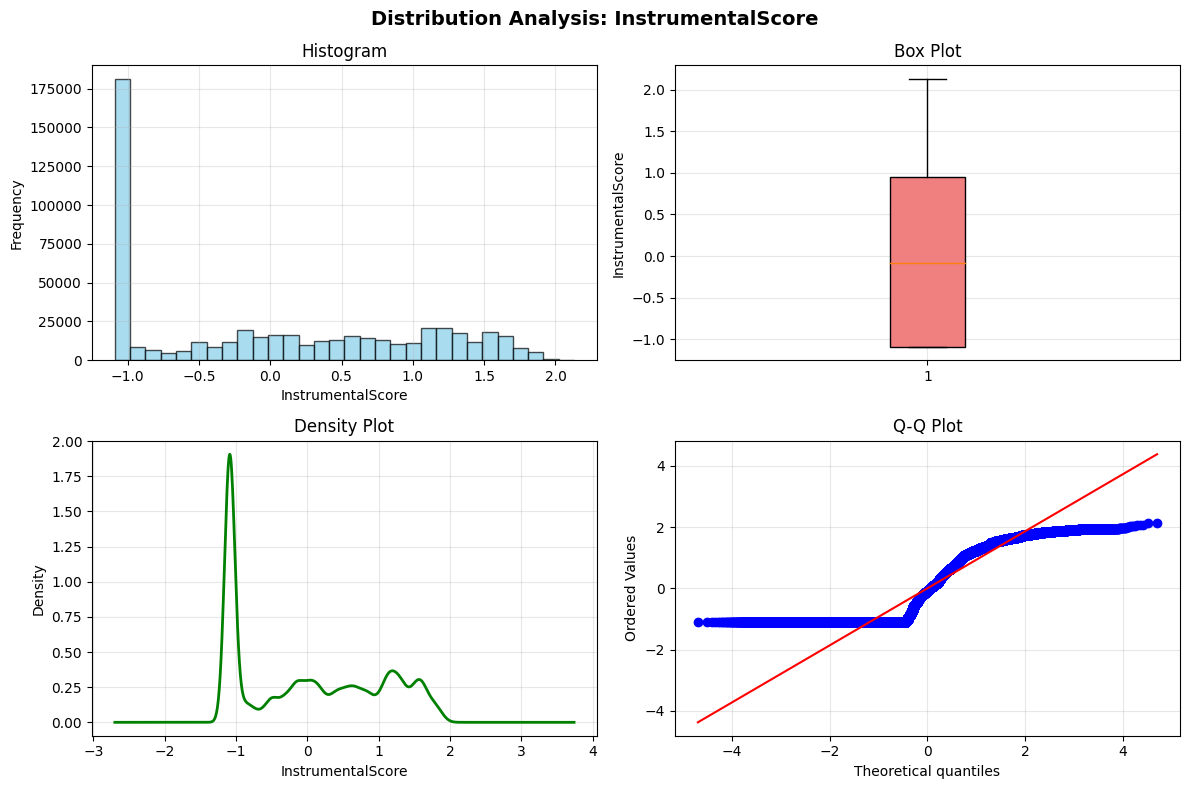


📊 Variable: LivePerformanceLikelihood
Count: 524,164
Mean: 0.000
Median: -0.102
Std Dev: 1.000
Range: -1.304 to 3.567
Skewness: 0.393 (Approximately normal)
Kurtosis: -0.754
IQR Outliers: 129 (0.0%)
Z-score Outliers: 232 (0.0%)


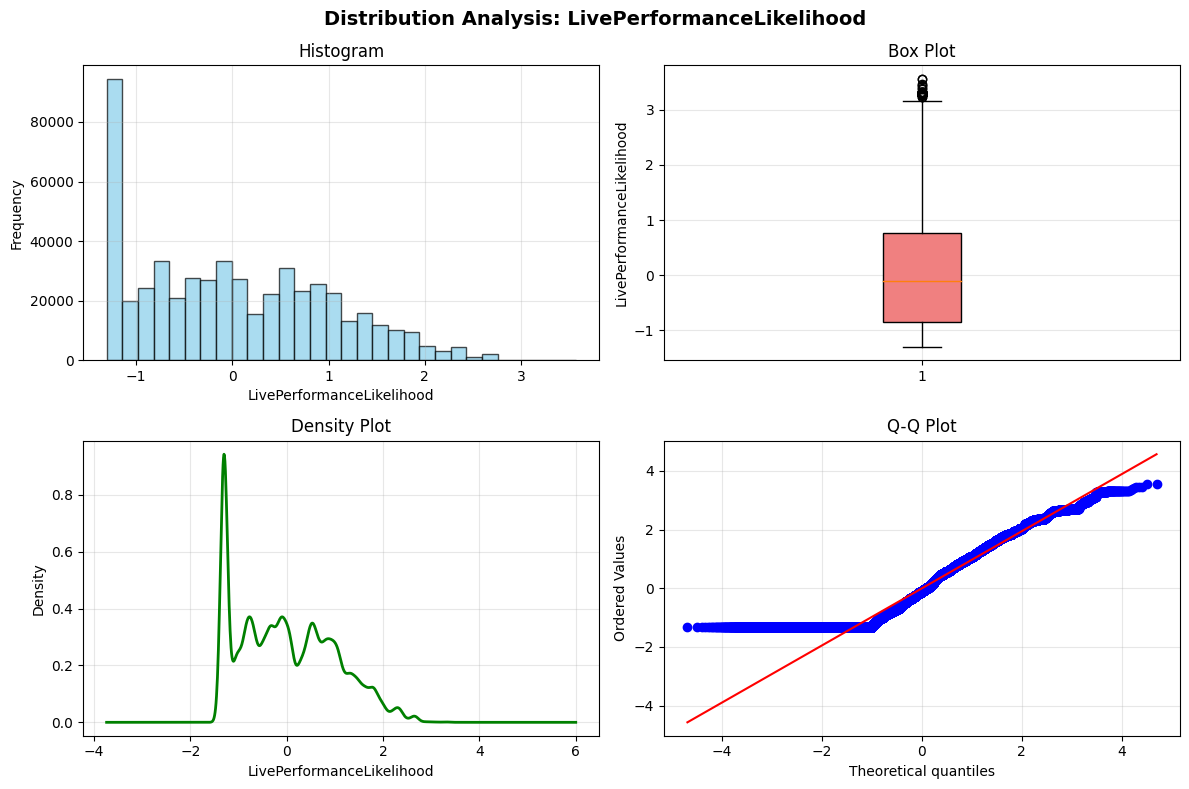


📊 Variable: MoodScore
Count: 524,164
Mean: 0.000
Median: 0.040
Std Dev: 1.000
Range: -2.352 to 1.872
Skewness: -0.269 (Approximately normal)
Kurtosis: -0.142
IQR Outliers: 0 (0.0%)
Z-score Outliers: 0 (0.0%)


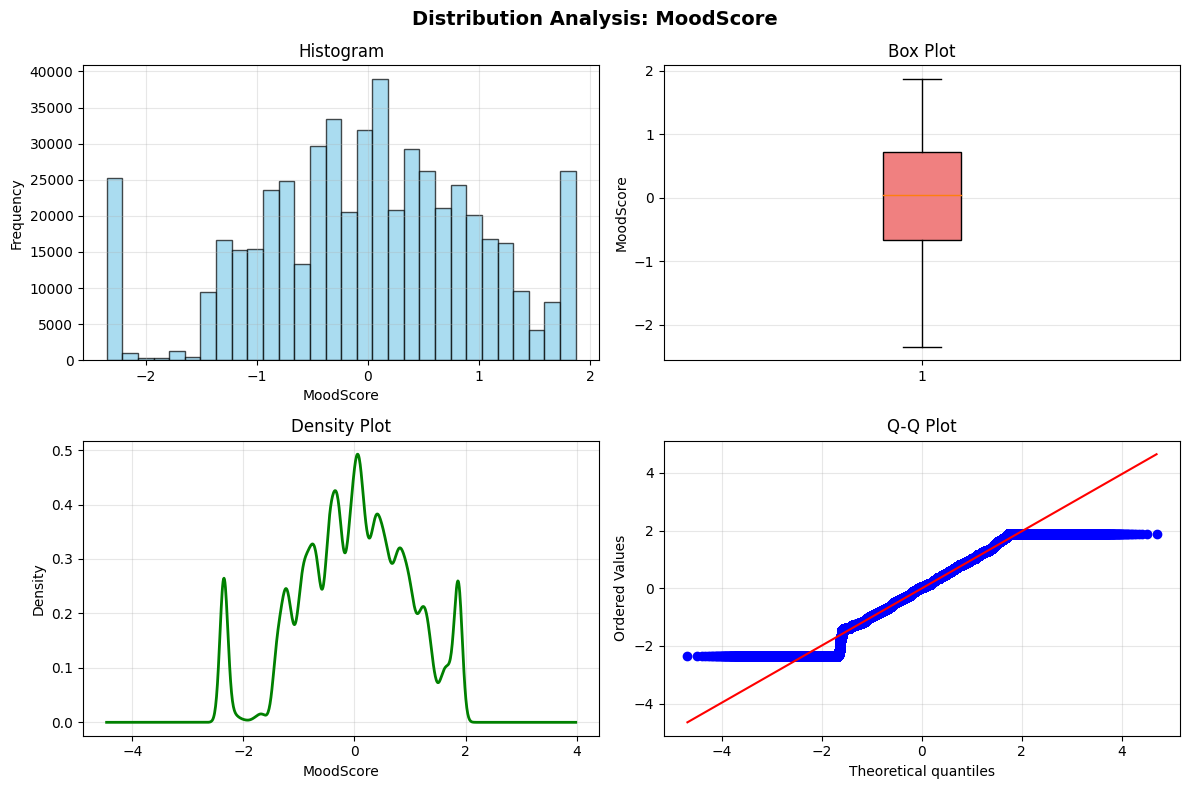


📊 Variable: TrackDurationMs
Count: 524,164
Mean: 0.000
Median: 0.030
Std Dev: 1.000
Range: -2.999 to 3.756
Skewness: -0.190 (Approximately normal)
Kurtosis: -0.129
IQR Outliers: 4267 (0.8%)
Z-score Outliers: 23 (0.0%)


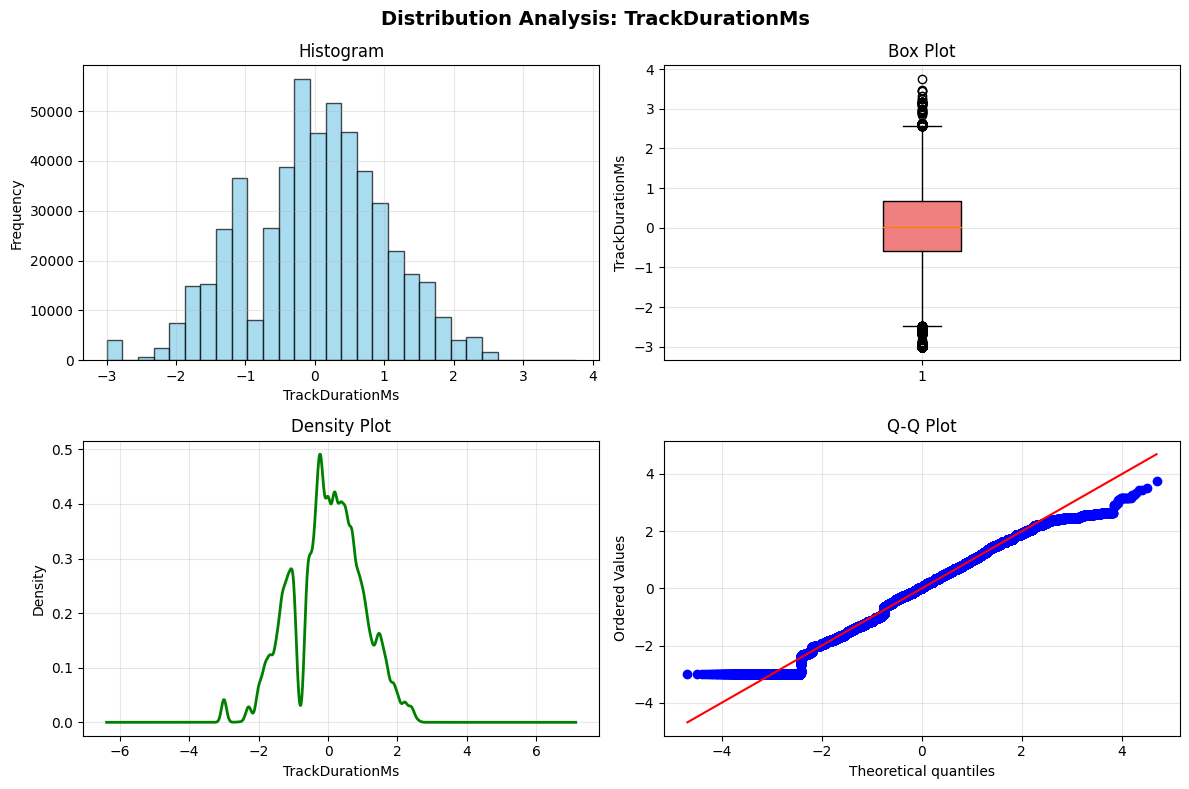


📊 Variable: Energy
Count: 524,164
Mean: 0.000
Median: 0.038
Std Dev: 1.000
Range: -1.727 to 1.721
Skewness: -0.030 (Approximately normal)
Kurtosis: -1.209
IQR Outliers: 0 (0.0%)
Z-score Outliers: 0 (0.0%)


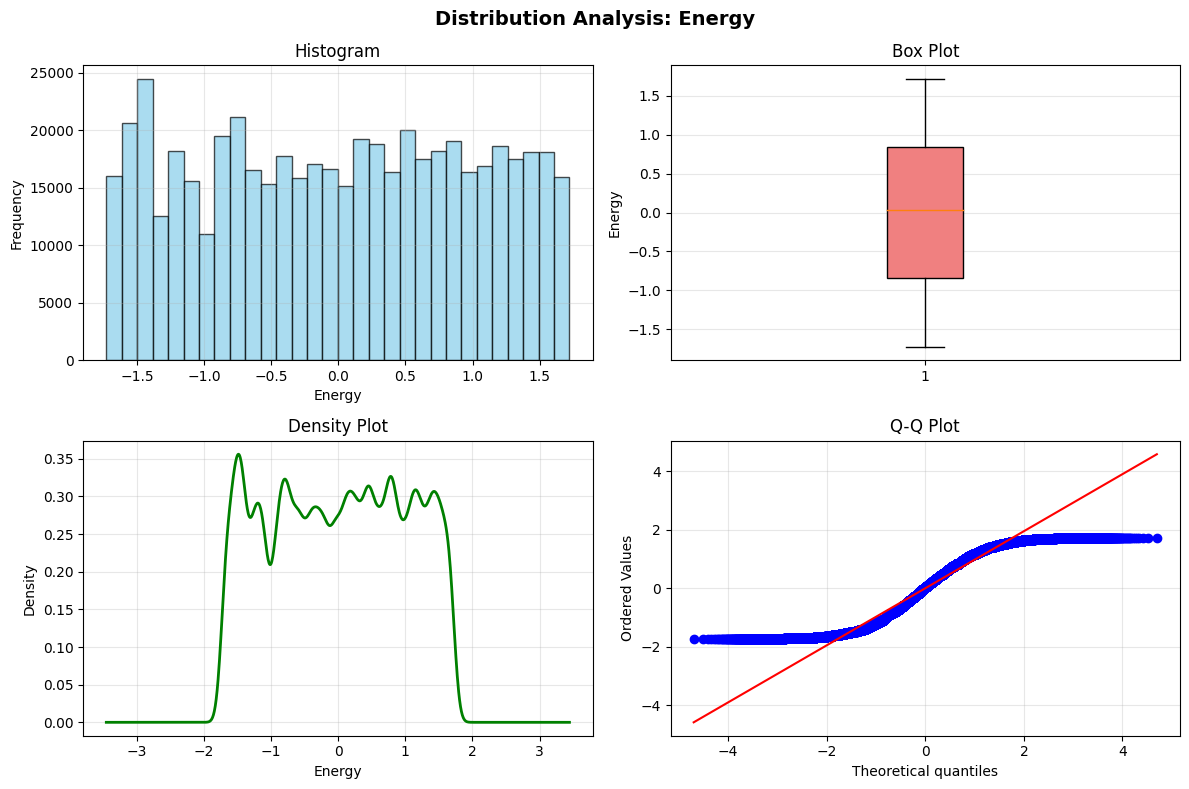


📊 Variable: BeatsPerMinute
Count: 524,164
Mean: -0.000
Median: -0.011
Std Dev: 1.000
Range: -2.732 to 3.287
Skewness: 0.072 (Approximately normal)
Kurtosis: -0.154
IQR Outliers: 2141 (0.4%)
Z-score Outliers: 505 (0.1%)


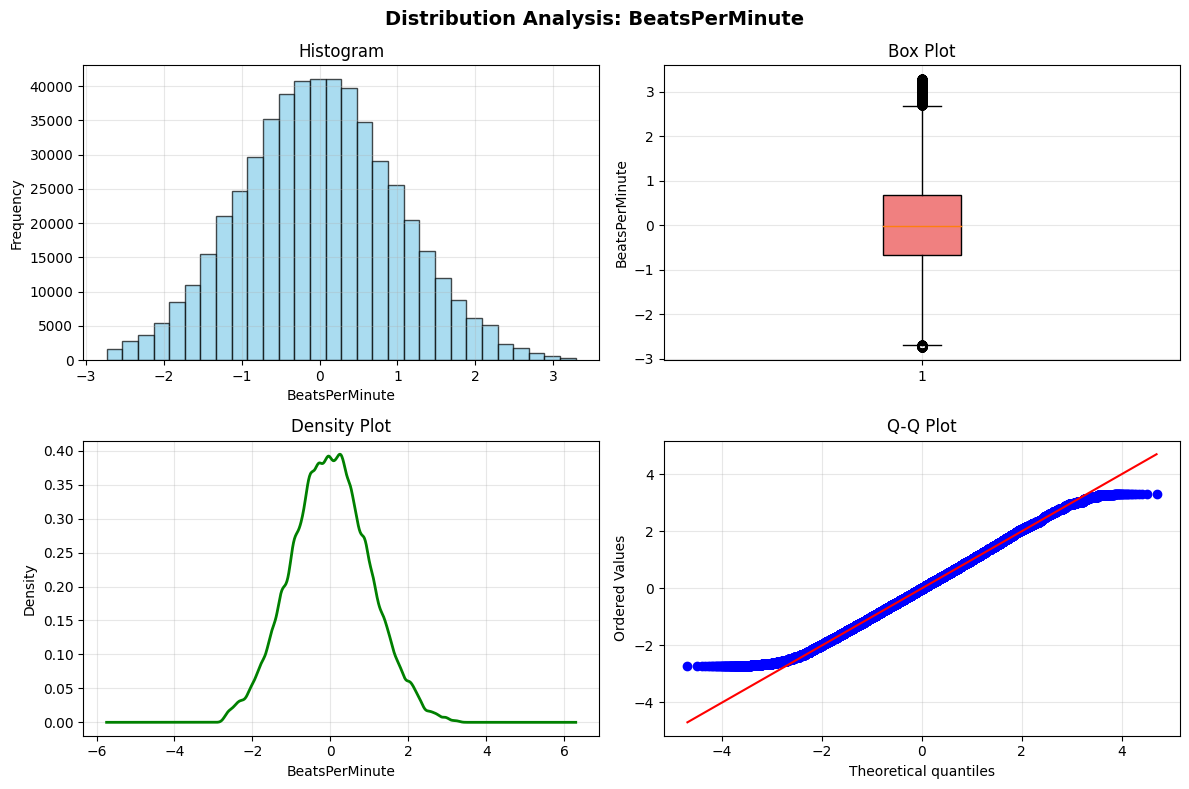

{'id': {'stats': {'count': 524164,
   'mean': -1.1104856669566663e-16,
   'median': 0.0,
   'std': 1.0000009539012862,
   'min': -1.7320475031657605,
   'max': 1.7320475031657605,
   'q25': -0.8660237515828804,
   'q75': 0.8660237515828804,
   'skewness': 6.662933069069207e-16,
   'kurtosis': -1.2000000000000002},
  'iqr_outliers': Series([], Name: id, dtype: float64),
  'zscore_outliers': Series([], Name: id, dtype: float64),
  'iqr_bounds': (-3.4640950063315215, 3.4640950063315215)},
 'RhythmScore': {'stats': {'count': 524164,
   'mean': 2.0067907487337023e-16,
   'median': 0.011747254405450786,
   'std': 1.0000009539014232,
   'min': -3.5433180117025347,
   'max': 2.180744976487345,
   'q25': -0.7456619456675229,
   'q75': 0.6777354693385818,
   'skewness': 0.1681546016240518,
   'kurtosis': -0.5267315990366512},
  'iqr_outliers': 317326   -3.021153
  368573   -3.039645
  388492   -3.039645
  391345   -3.399410
  404581   -3.543318
  440983   -2.918915
  499041   -3.455953
  515137 

In [53]:
analyze_numerical_variables(train_scaled)

##* analysed univariate distribution


##* appled yeo johnson transformation for skewed columns


* need to check on outliers for 4 columns

*  if they donot have tat much effect, should check for a robust model

*  models in mind rn

*  xgboost, lightgbm, neural nets, logistic regression, svm

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import HuberRegressor, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# 1. Prepare your data (replace with your real DataFrame)
# Example:
df=train_scaled.copy()
X = df.drop(columns=["BeatsPerMinute"])
y = df["BeatsPerMinute"]

# 2. Split into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define 5-fold CV on training set
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Define models
models = {
    "Huber Regressor": HuberRegressor(),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

# 5. Cross-validation on training set
cv_results = {}

for name, model in models.items():
    rmse_scores = -cross_val_score(model, X_train, y_train,
                                    scoring='neg_root_mean_squared_error',
                                    cv=cv)
    cv_results[name] = {
        "CV Mean RMSE": np.mean(rmse_scores),
        "CV Std Dev": np.std(rmse_scores)
    }

# 6. Convert results to DataFrame
cv_df = pd.DataFrame(cv_results).T.sort_values(by="CV Mean RMSE")
print("Cross-Validation Results on Training Set:")
print(cv_df)


Cross-Validation Results on Training Set:
                 CV Mean RMSE  CV Std Dev
Huber Regressor      1.000191    0.002354
XGBoost              1.005006    0.002488


In [59]:
test

id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0       524164     0.410013     -16.794967      0.023500         0.232910   
1       524165     0.463071      -1.357000      0.141818         0.057725   
2       524166     0.686569      -3.368928      0.167851         0.287823   
3       524167     0.885793      -5.598049      0.118488         0.000005   
4       524168     0.637391      -7.068160      0.126099         0.539073   
...        ...          ...            ...           ...              ...   
174717  698881     0.332976      -9.654381      0.155402         0.143983   
174718  698882     0.828106     -11.143536      0.121822         0.451146   
174719  698883     0.569334      -4.253765      0.137968         0.246896   
174720  698884     0.764595     -11.088025      0.055225         0.430128   
174721  698885     0.823192     -16.435543      0.023500         0.346906   

        InstrumentalScore  LivePerformanceLikelihood  MoodScore  \
0                0.012689                   0.271585   0.664321   
1                0.257942                   0.097624   0.829552   
2                0.210915                   0.325909   0.304978   
3                0.376906                   0.134435   0.487740   
4                0.068950                   0.024300   0.591248   
...                   ...                        ...        ...   
174717           0.351255                   0.307580   0.679634   
174718           0.096678                   0.140123   0.274977   
174719           0.079425                   0.102919   0.569331   
174720           0.006836                   0.105584   0.653928   
174721           0.295836                   0.167825   0.391377   

        TrackDurationMs    Energy  
0           302901.5498  0.424867  
1           221995.6643  0.846000  
2           357724.0127  0.134067  
3           271790.3989  0.316467  
4           277728.5383  0.481067  
...                 ...       ...  
174717      255610.4189  0.427533  
174718      241204.9403  0.098333  
174719      127422.2955  0.193200  
174720      171586.5838  0.067467  
174721      334815.4486  0.436867  

[174722 rows x 10 columns]

In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174722 entries, 0 to 174721
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         174722 non-null  int64  
 1   RhythmScore                174722 non-null  float64
 2   AudioLoudness              174722 non-null  float64
 3   VocalContent               174722 non-null  float64
 4   AcousticQuality            174722 non-null  float64
 5   InstrumentalScore          174722 non-null  float64
 6   LivePerformanceLikelihood  174722 non-null  float64
 7   MoodScore                  174722 non-null  float64
 8   TrackDurationMs            174722 non-null  float64
 9   Energy                     174722 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 13.3 MB


In [61]:
test.describe()

id    RhythmScore  AudioLoudness   VocalContent  \
count  174722.000000  174722.000000  174722.000000  174722.000000   
mean   611524.500000       0.632591      -8.377495       0.074475   
std     50438.041204       0.157229       4.622288       0.050024   
min    524164.000000       0.140859     -27.442731       0.023500   
25%    567844.250000       0.514918     -11.550095       0.023500   
50%    611524.500000       0.634556      -8.253186       0.066432   
75%    655204.750000       0.739179      -4.903740       0.107302   
max    698885.000000       0.975000      -1.357000       0.258857   

       AcousticQuality  InstrumentalScore  LivePerformanceLikelihood  \
count    174722.000000      174722.000000              174722.000000   
mean          0.262903           0.117407                   0.178317   
std           0.222899           0.131628                   0.118165   
min           0.000005           0.000001                   0.024300   
25%           0.069448           0.000001                   0.077821   
50%           0.242412           0.073968                   0.165956   
75%           0.396870           0.202977                   0.268133   
max           0.995000           0.680914                   0.599544   

           MoodScore  TrackDurationMs         Energy  
count  174722.000000    174722.000000  174722.000000  
mean        0.555861    241753.736419       0.500545  
std         0.226218     59103.896616       0.290550  
min         0.025600     63973.000000       0.000067  
25%         0.403788    207518.151300       0.253817  
50%         0.566015    243584.585400       0.511867  
75%         0.716694    281737.445300       0.746133  
max         0.978000    449288.808400       0.999867


📊 Variable: id
Count: 174,722
Mean: 611524.500
Median: 611524.500
Std Dev: 50438.041
Range: 524164.000 to 698885.000
Skewness: -0.000 (Approximately normal)
Kurtosis: -1.200
IQR Outliers: 0 (0.0%)
Z-score Outliers: 0 (0.0%)


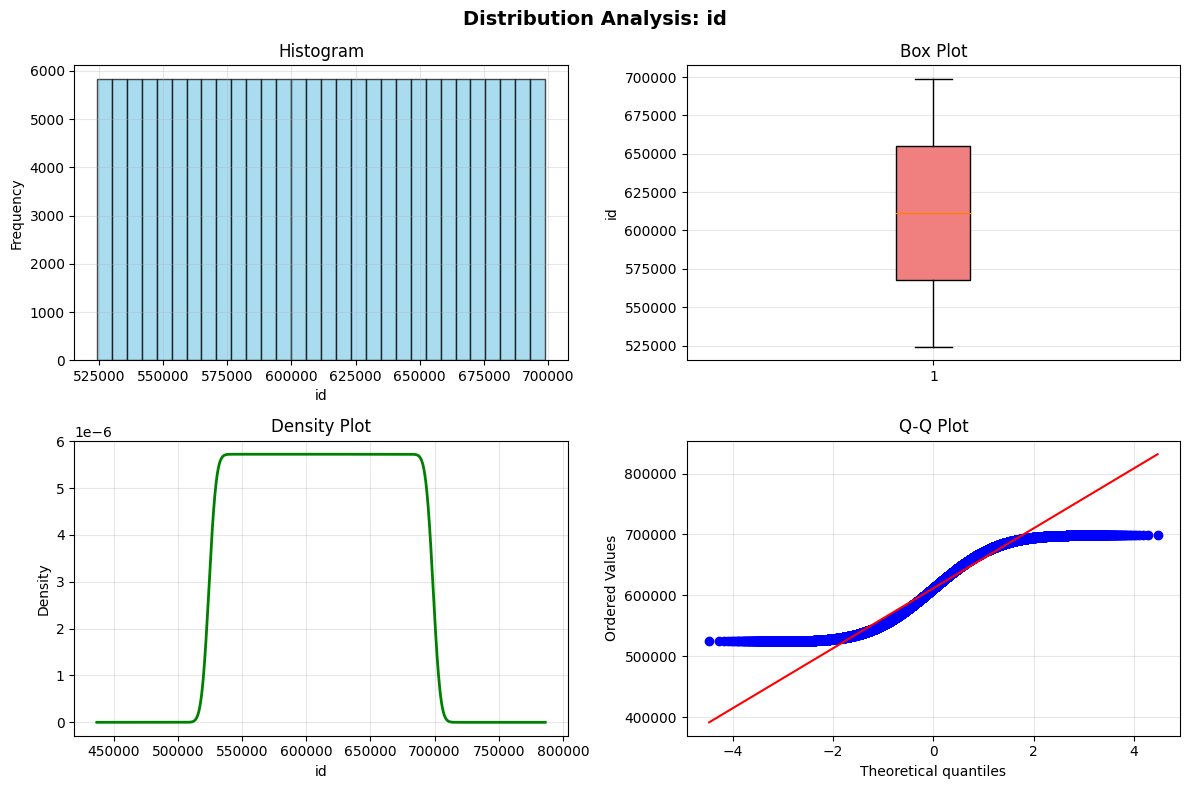


📊 Variable: RhythmScore
Count: 174,722
Mean: 0.633
Median: 0.635
Std Dev: 0.157
Range: 0.141 to 0.975
Skewness: 0.169 (Approximately normal)
Kurtosis: -0.529
IQR Outliers: 1 (0.0%)
Z-score Outliers: 1 (0.0%)


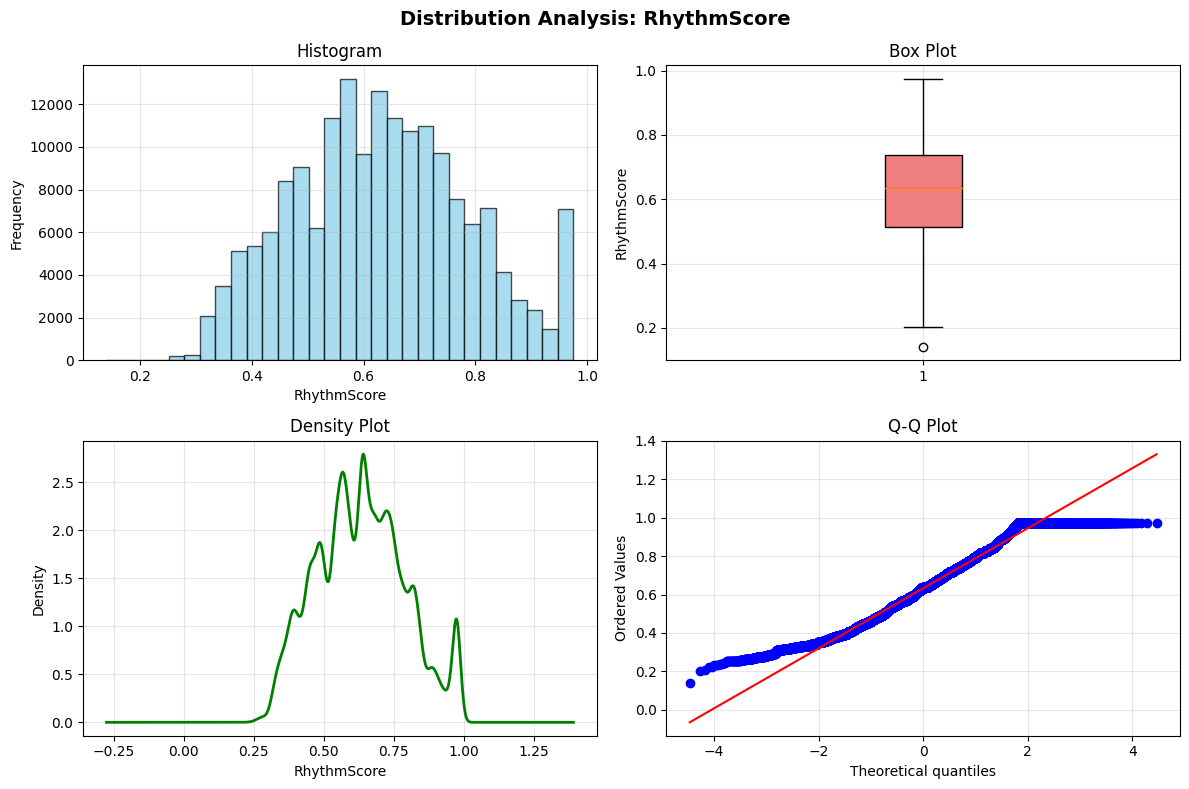


📊 Variable: AudioLoudness
Count: 174,722
Mean: -8.377
Median: -8.253
Std Dev: 4.622
Range: -27.443 to -1.357
Skewness: -0.313 (Approximately normal)
Kurtosis: -0.367
IQR Outliers: 614 (0.4%)
Z-score Outliers: 438 (0.3%)


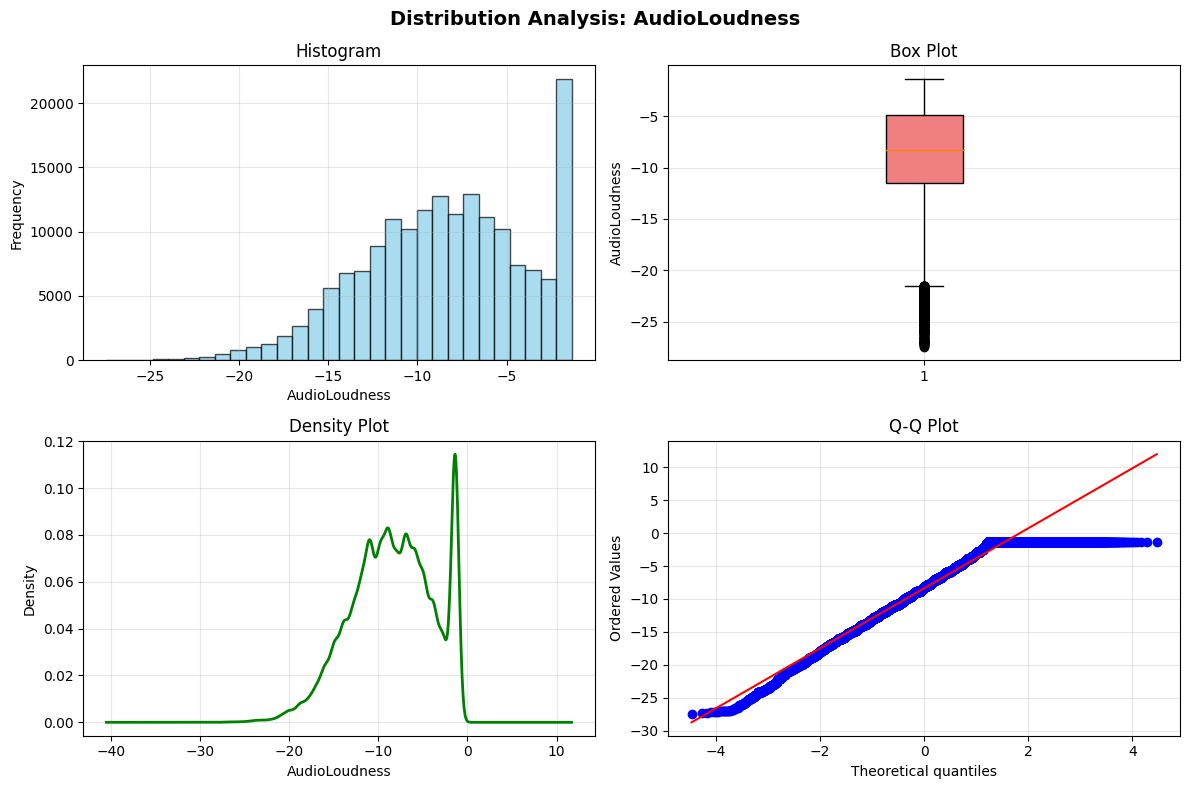


📊 Variable: VocalContent
Count: 174,722
Mean: 0.074
Median: 0.066
Std Dev: 0.050
Range: 0.024 to 0.259
Skewness: 0.793 (Right-skewed)
Kurtosis: -0.137
IQR Outliers: 440 (0.3%)
Z-score Outliers: 1090 (0.6%)


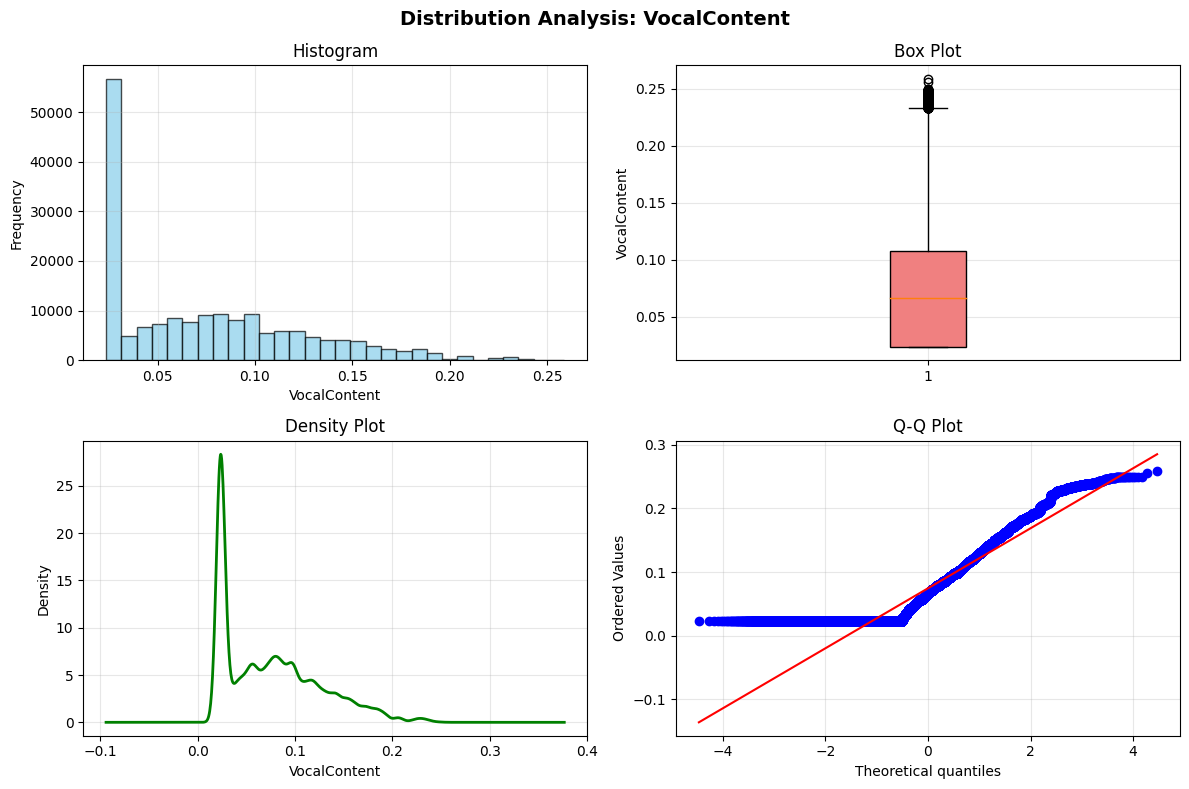


📊 Variable: AcousticQuality
Count: 174,722
Mean: 0.263
Median: 0.242
Std Dev: 0.223
Range: 0.000 to 0.995
Skewness: 0.787 (Right-skewed)
Kurtosis: 0.271
IQR Outliers: 2266 (1.3%)
Z-score Outliers: 1996 (1.1%)


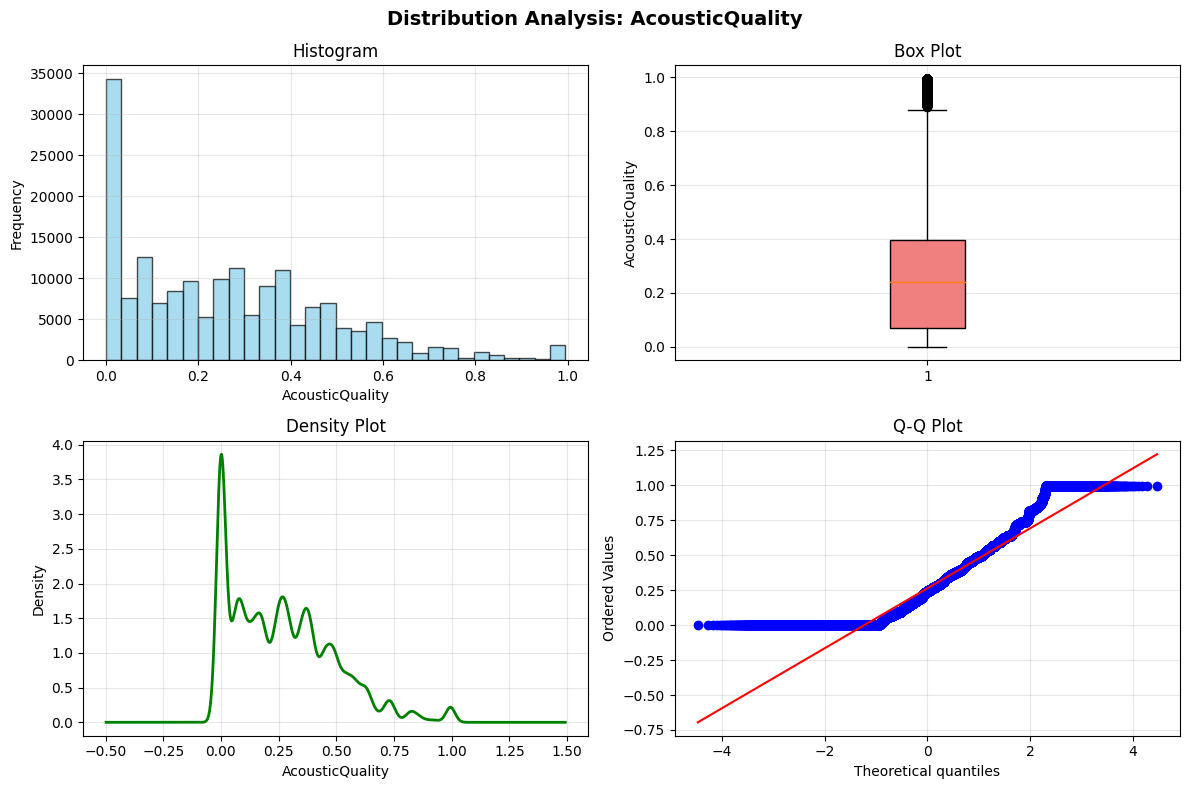


📊 Variable: InstrumentalScore
Count: 174,722
Mean: 0.117
Median: 0.074
Std Dev: 0.132
Range: 0.000 to 0.681
Skewness: 1.043 (Right-skewed)
Kurtosis: 0.176
IQR Outliers: 998 (0.6%)
Z-score Outliers: 953 (0.5%)


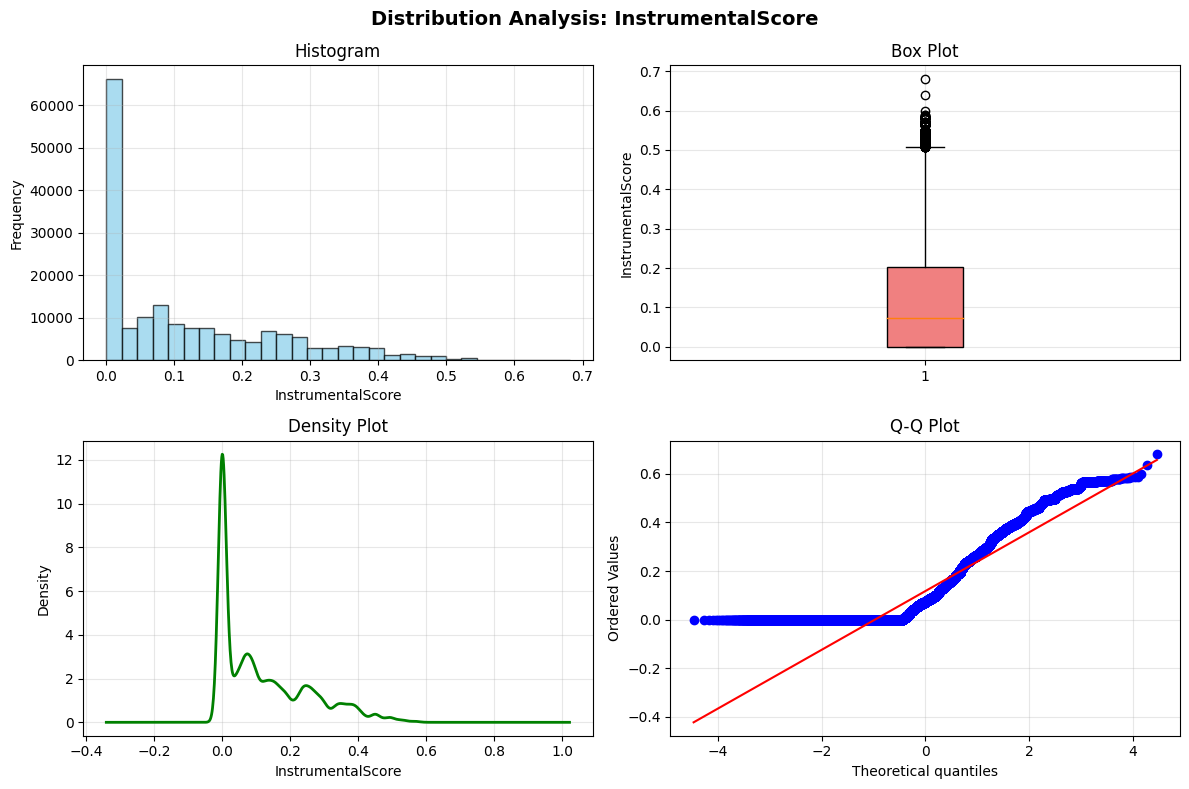


📊 Variable: LivePerformanceLikelihood
Count: 174,722
Mean: 0.178
Median: 0.166
Std Dev: 0.118
Range: 0.024 to 0.600
Skewness: 0.401 (Approximately normal)
Kurtosis: -0.738
IQR Outliers: 43 (0.0%)
Z-score Outliers: 84 (0.0%)


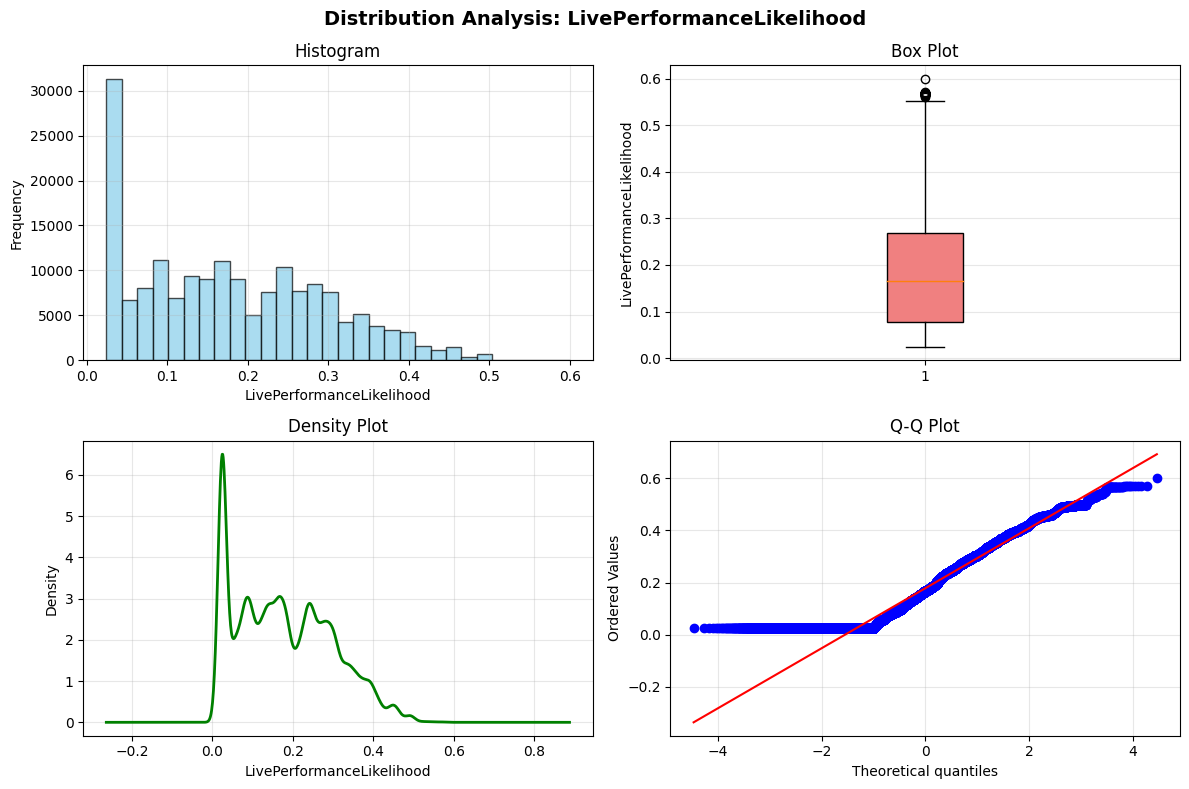


📊 Variable: MoodScore
Count: 174,722
Mean: 0.556
Median: 0.566
Std Dev: 0.226
Range: 0.026 to 0.978
Skewness: -0.274 (Approximately normal)
Kurtosis: -0.152
IQR Outliers: 0 (0.0%)
Z-score Outliers: 0 (0.0%)


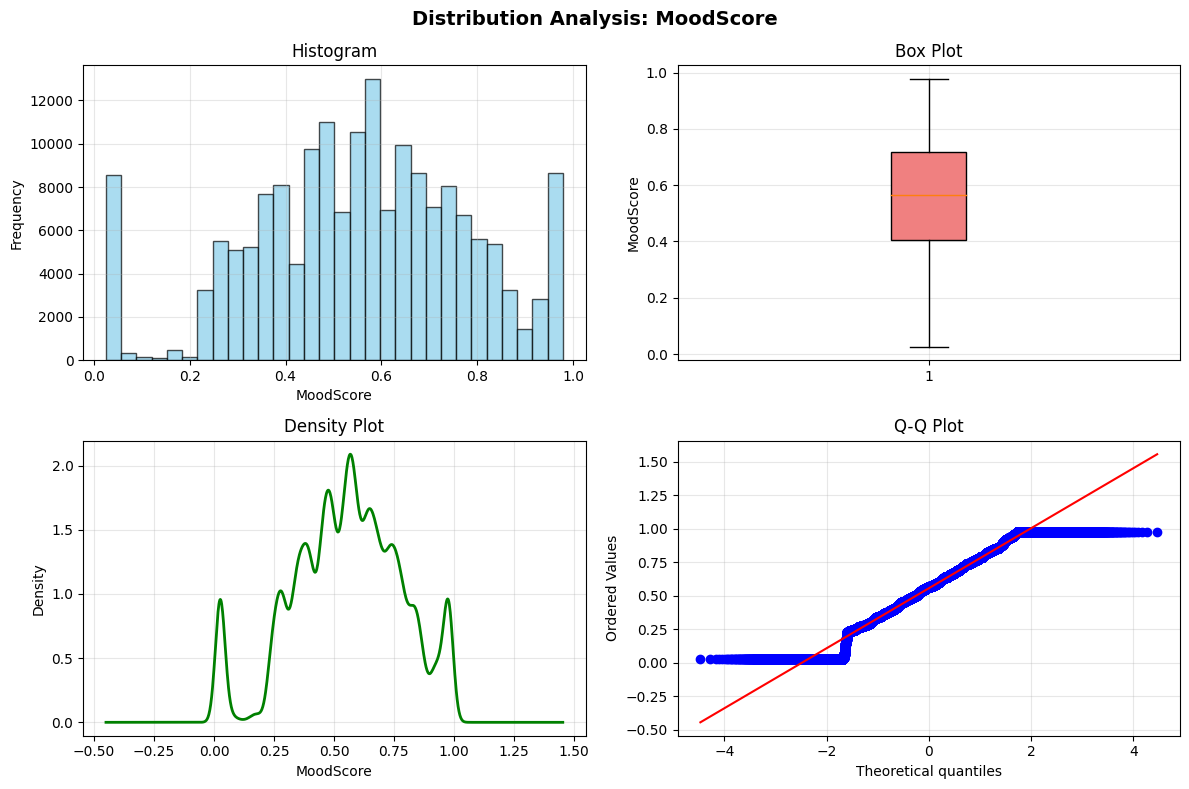


📊 Variable: TrackDurationMs
Count: 174,722
Mean: 241753.736
Median: 243584.585
Std Dev: 59103.897
Range: 63973.000 to 449288.808
Skewness: -0.189 (Approximately normal)
Kurtosis: -0.131
IQR Outliers: 1397 (0.8%)
Z-score Outliers: 1222 (0.7%)


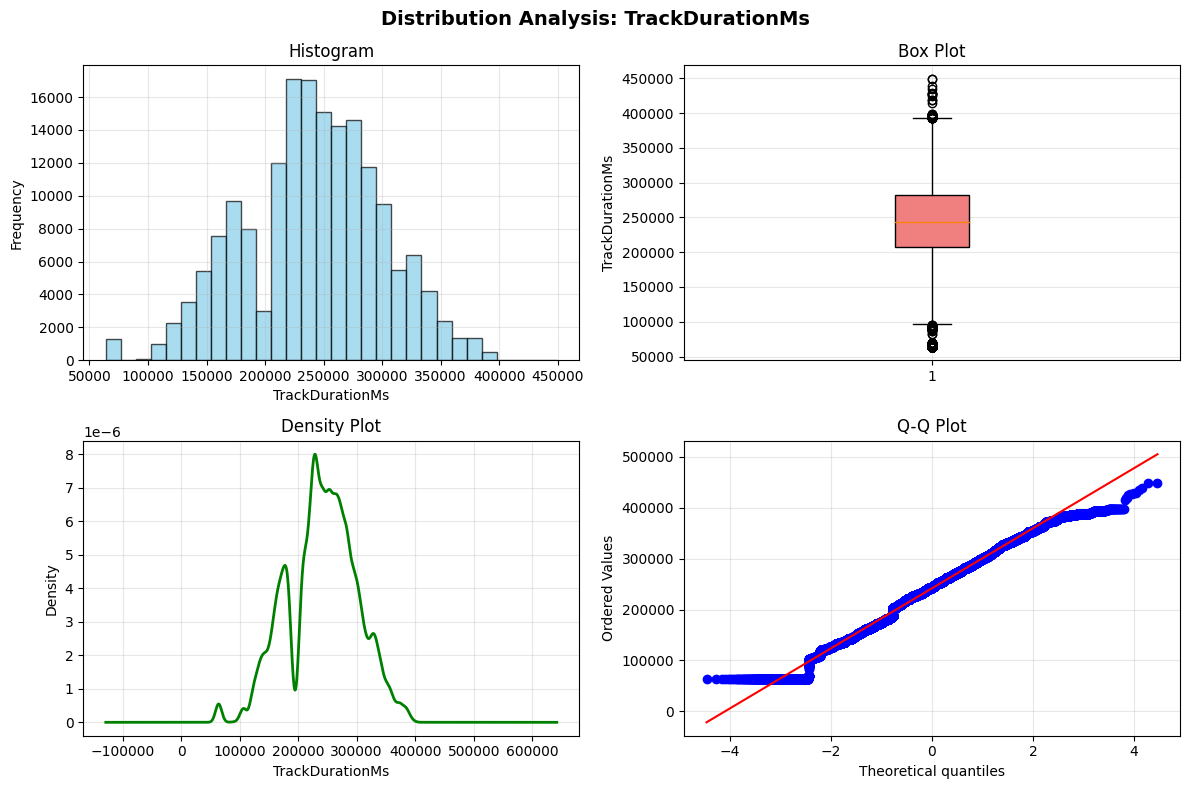


📊 Variable: Energy
Count: 174,722
Mean: 0.501
Median: 0.512
Std Dev: 0.291
Range: 0.000 to 1.000
Skewness: -0.033 (Approximately normal)
Kurtosis: -1.214
IQR Outliers: 0 (0.0%)
Z-score Outliers: 0 (0.0%)


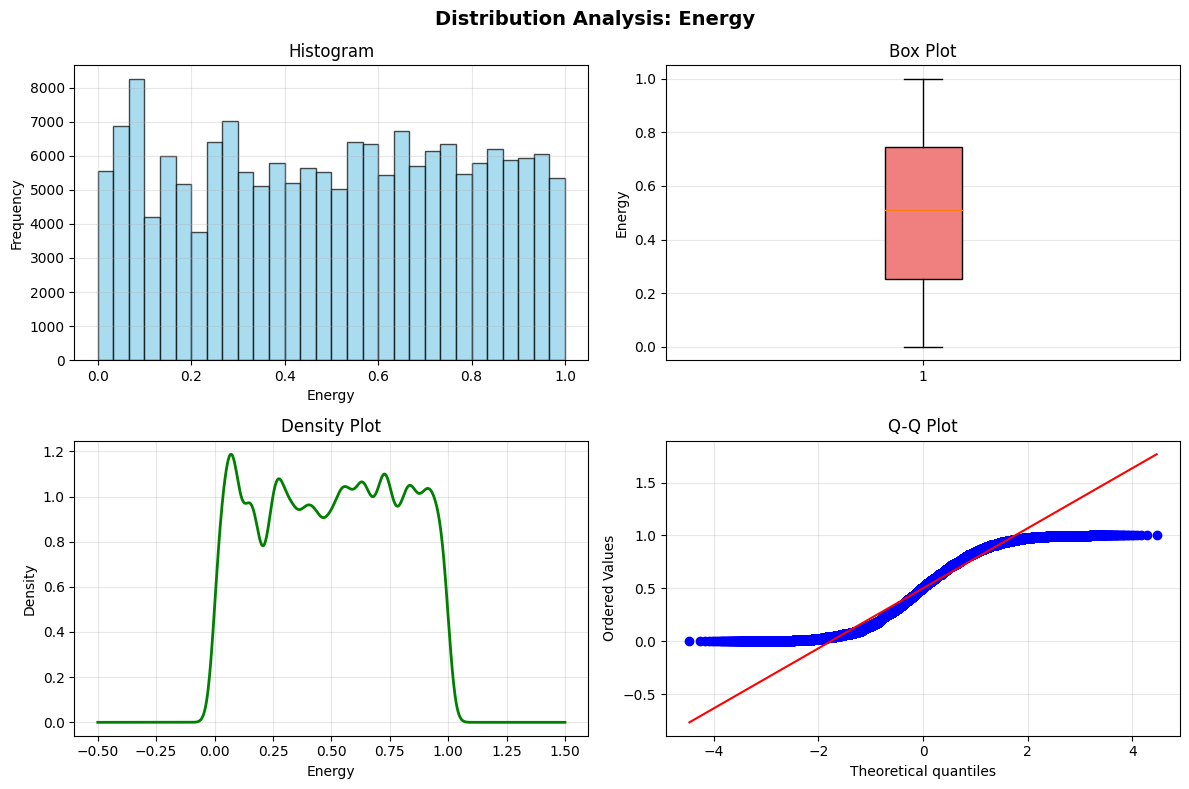

{'id': {'stats': {'count': 174722,
   'mean': 611524.5,
   'median': 611524.5,
   'std': 50438.04120403567,
   'min': 524164,
   'max': 698885,
   'q25': 567844.25,
   'q75': 655204.75,
   'skewness': -9.13513943445932e-17,
   'kurtosis': -1.1999999999999997},
  'iqr_outliers': Series([], Name: id, dtype: int64),
  'zscore_outliers': Series([], Name: id, dtype: int64),
  'iqr_bounds': (436803.5, 786245.5)},
 'RhythmScore': {'stats': {'count': 174722,
   'mean': 0.6325913468095755,
   'median': 0.634555588,
   'std': 0.1572291942211902,
   'min': 0.140859056,
   'max': 0.975,
   'q25': 0.514918311,
   'q75': 0.7391788859999999,
   'skewness': 0.16911747205889932,
   'kurtosis': -0.5291878588184655},
  'iqr_outliers': 27219    0.140859
  Name: RhythmScore, dtype: float64,
  'zscore_outliers': 27219    0.140859
  Name: RhythmScore, dtype: float64,
  'iqr_bounds': (0.17852744850000002, 1.0755697485)},
 'AudioLoudness': {'stats': {'count': 174722,
   'mean': -8.377495315054558,
   'median':

In [62]:
analyze_numerical_variables(test)

In [63]:
skew_categories(test)

skew category
AcousticQuality            7.865933e-01    right
AudioLoudness             -3.134276e-01   normal
Energy                    -3.260410e-02   normal
InstrumentalScore          1.042666e+00    right
LivePerformanceLikelihood  4.008354e-01   normal
MoodScore                 -2.739134e-01   normal
RhythmScore                1.691175e-01   normal
TrackDurationMs           -1.890791e-01   normal
VocalContent               7.932360e-01    right
id                        -9.135139e-17   normal

In [65]:
skewed_col_test=['AcousticQuality','InstrumentalScore','VocalContent']

In [67]:
test_transform= transform_columns(test,skewed_col_test)

In [68]:
print("After transform skew:",test_transform[skewed_col_test].skew())

After transform skew: AcousticQuality      0.074013
InstrumentalScore    0.281397
VocalContent         0.176389
dtype: float64


In [74]:
from sklearn.preprocessing import StandardScaler
numerical_cols_test = test_transform.select_dtypes(include=[np.number]).columns.tolist()

# Apply standardization
scaler = StandardScaler()
test_scaled = pd.DataFrame(
    scaler.fit_transform(test_transform[numerical_cols_test]), 
    columns=numerical_cols_test, 
    index=test.index
)

In [76]:
skew_categories(test_scaled)

skew category
AcousticQuality            7.401319e-02   normal
AudioLoudness             -3.134276e-01   normal
Energy                    -3.260410e-02   normal
InstrumentalScore          2.813968e-01   normal
LivePerformanceLikelihood  4.008354e-01   normal
MoodScore                 -2.739134e-01   normal
RhythmScore                1.691175e-01   normal
TrackDurationMs           -1.890791e-01   normal
VocalContent               1.763894e-01   normal
id                         8.328682e-17   normal


📊 Variable: id
Count: 174,722
Mean: 0.000
Median: 0.000
Std Dev: 1.000
Range: -1.732 to 1.732
Skewness: 0.000 (Approximately normal)
Kurtosis: -1.200
IQR Outliers: 0 (0.0%)
Z-score Outliers: 0 (0.0%)


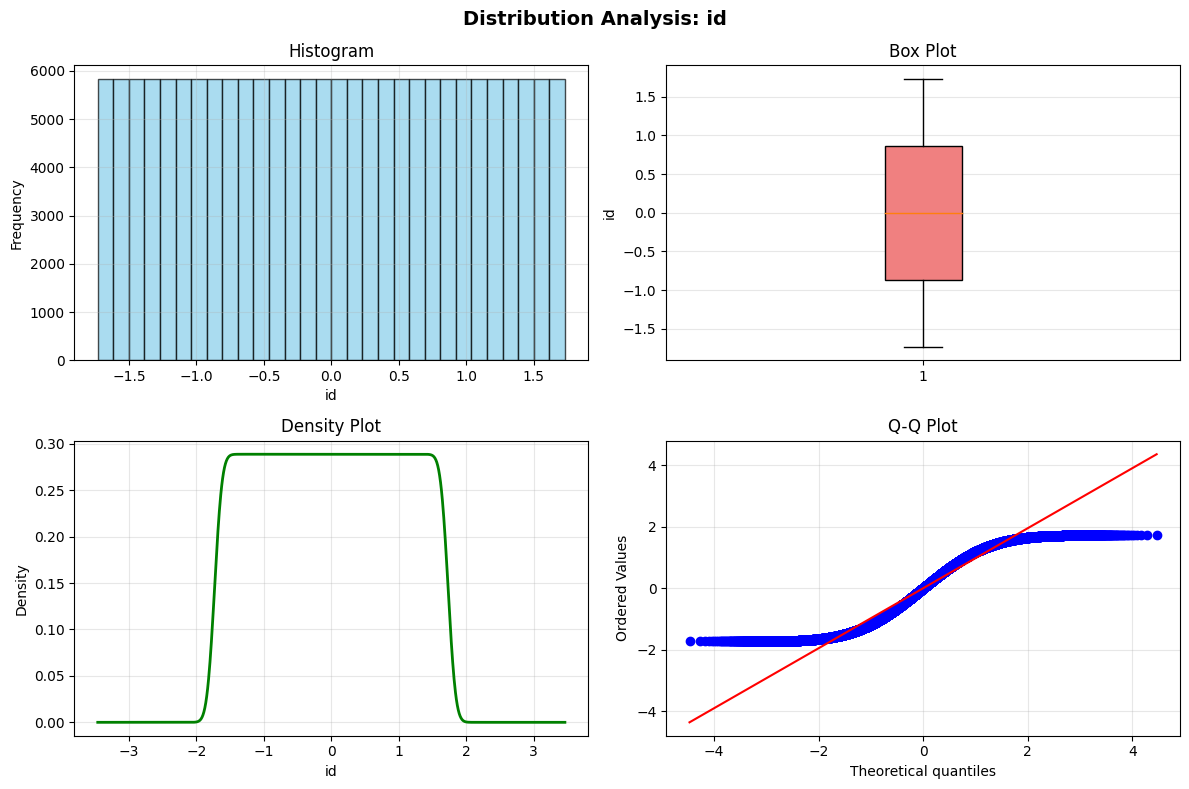


📊 Variable: RhythmScore
Count: 174,722
Mean: -0.000
Median: 0.012
Std Dev: 1.000
Range: -3.127 to 2.178
Skewness: 0.169 (Approximately normal)
Kurtosis: -0.529
IQR Outliers: 1 (0.0%)
Z-score Outliers: 1 (0.0%)


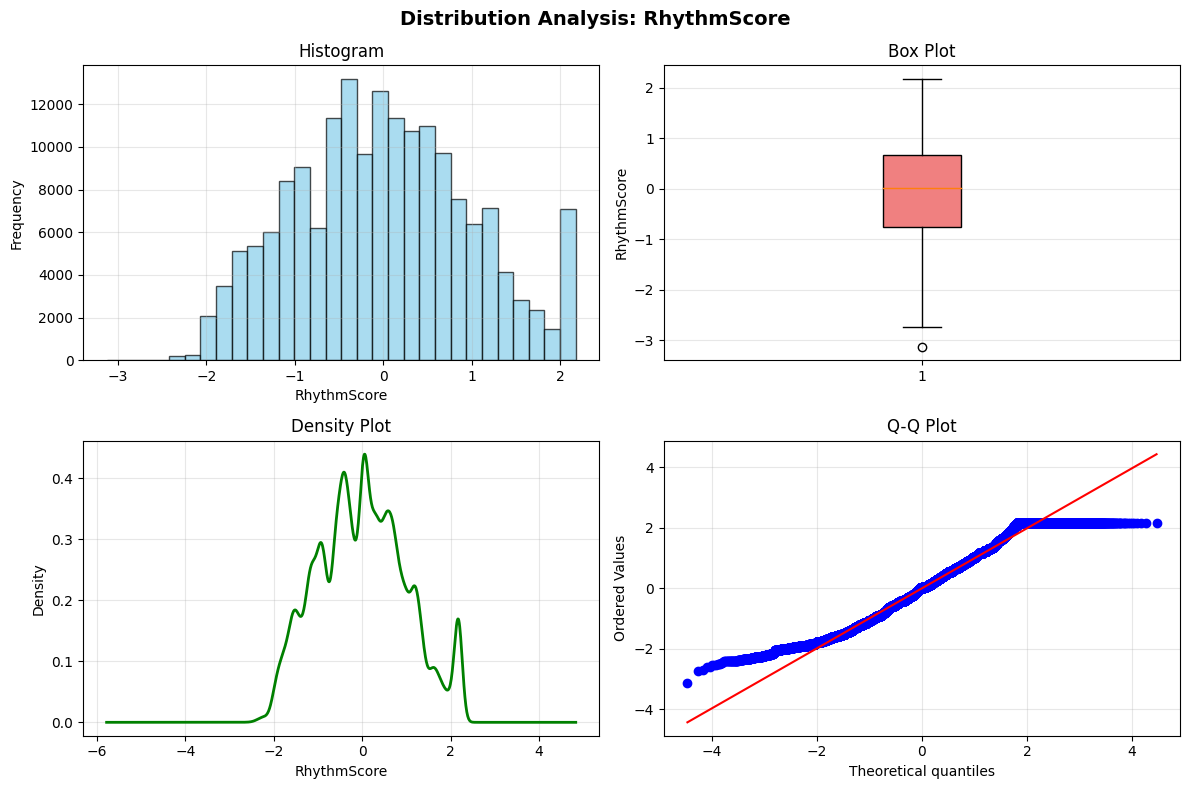


📊 Variable: AudioLoudness
Count: 174,722
Mean: -0.000
Median: 0.027
Std Dev: 1.000
Range: -4.125 to 1.519
Skewness: -0.313 (Approximately normal)
Kurtosis: -0.367
IQR Outliers: 614 (0.4%)
Z-score Outliers: 438 (0.3%)


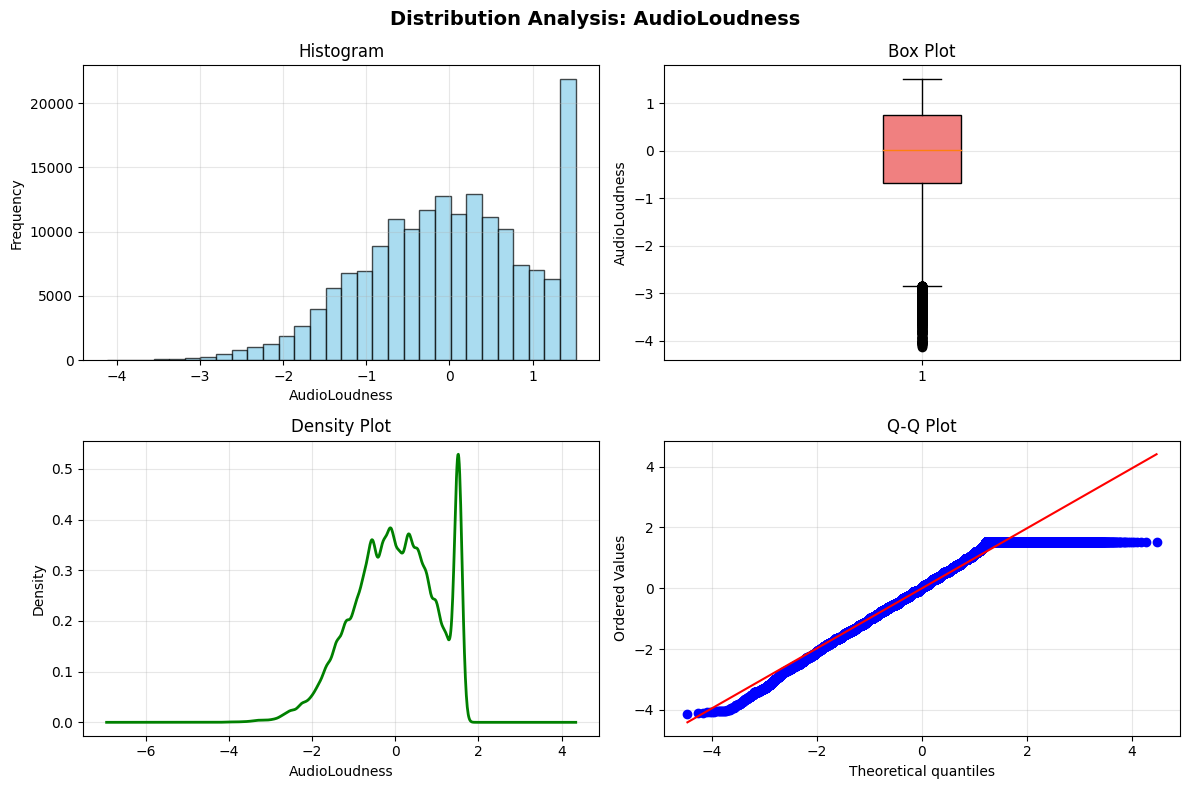


📊 Variable: VocalContent
Count: 174,722
Mean: 0.000
Median: 0.046
Std Dev: 1.000
Range: -1.177 to 2.206
Skewness: 0.176 (Approximately normal)
Kurtosis: -1.307
IQR Outliers: 0 (0.0%)
Z-score Outliers: 0 (0.0%)


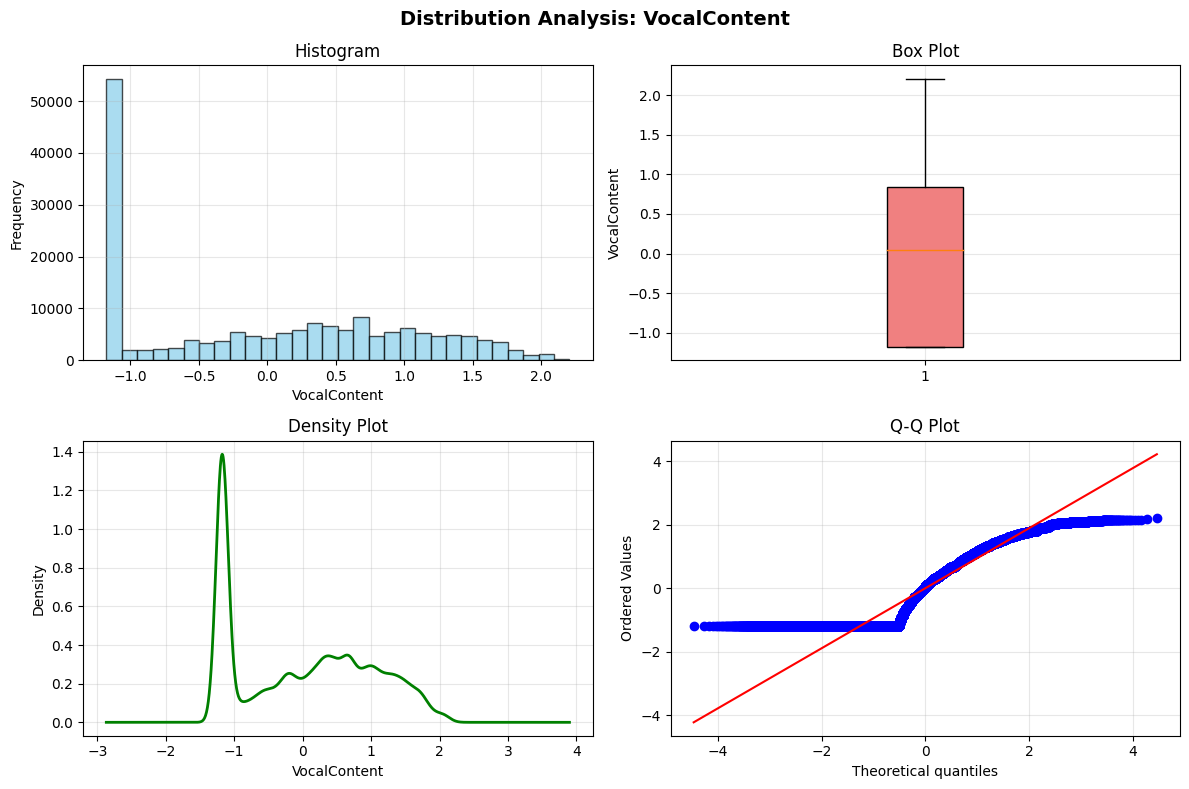


📊 Variable: AcousticQuality
Count: 174,722
Mean: -0.000
Median: 0.099
Std Dev: 1.000
Range: -1.410 to 2.244
Skewness: 0.074 (Approximately normal)
Kurtosis: -1.057
IQR Outliers: 0 (0.0%)
Z-score Outliers: 0 (0.0%)


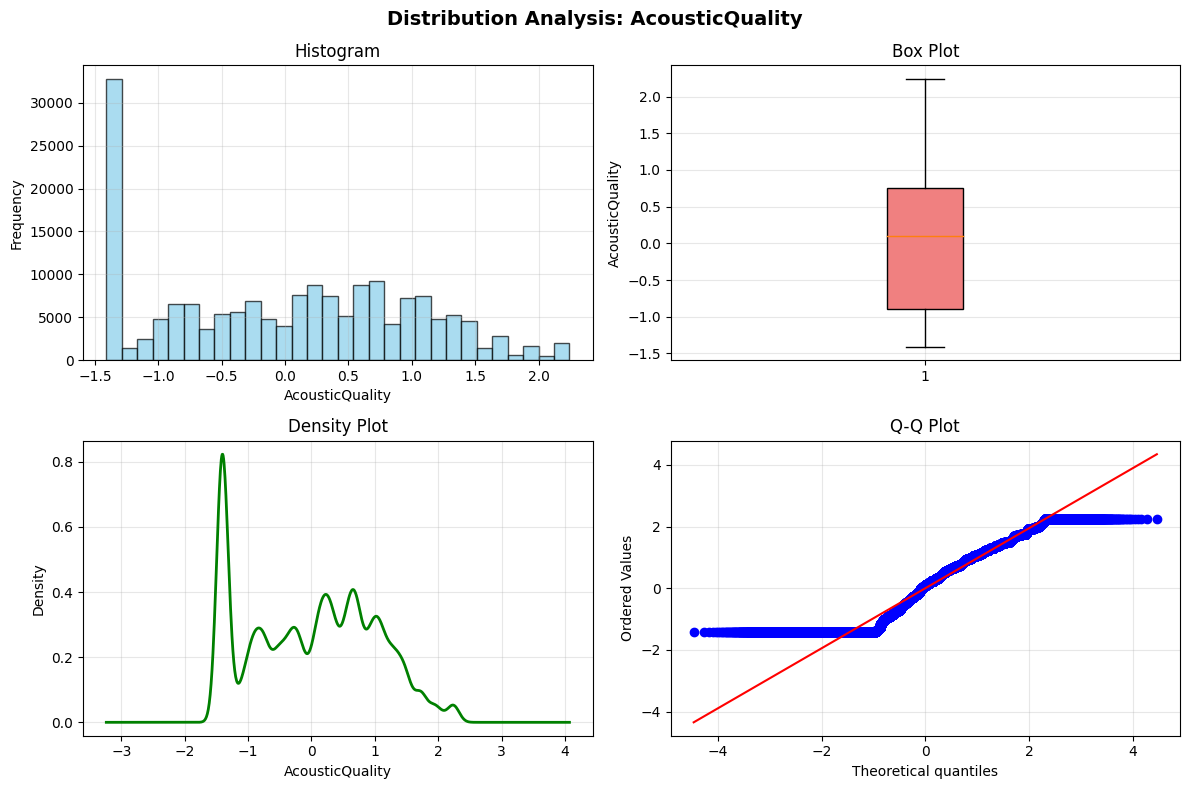


📊 Variable: InstrumentalScore
Count: 174,722
Mean: 0.000
Median: -0.078
Std Dev: 1.000
Range: -1.090 to 2.027
Skewness: 0.281 (Approximately normal)
Kurtosis: -1.391
IQR Outliers: 0 (0.0%)
Z-score Outliers: 0 (0.0%)


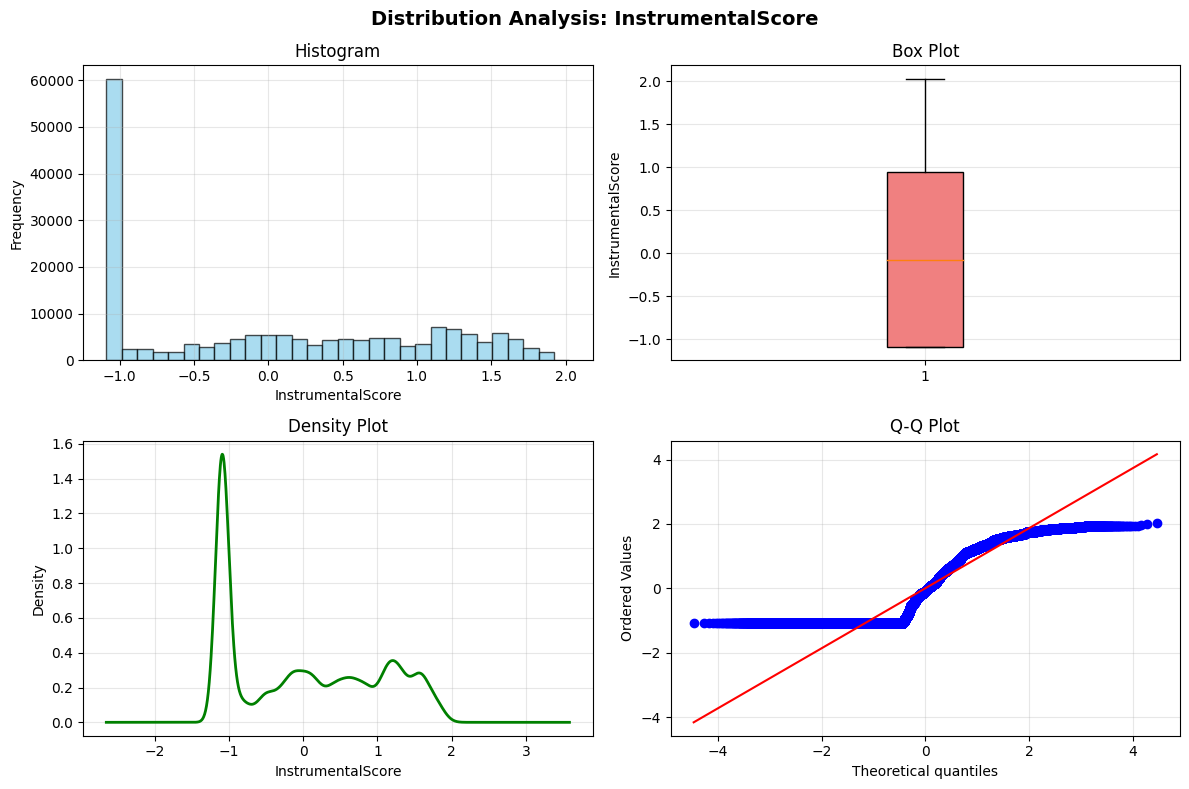


📊 Variable: LivePerformanceLikelihood
Count: 174,722
Mean: 0.000
Median: -0.105
Std Dev: 1.000
Range: -1.303 to 3.565
Skewness: 0.401 (Approximately normal)
Kurtosis: -0.738
IQR Outliers: 43 (0.0%)
Z-score Outliers: 84 (0.0%)


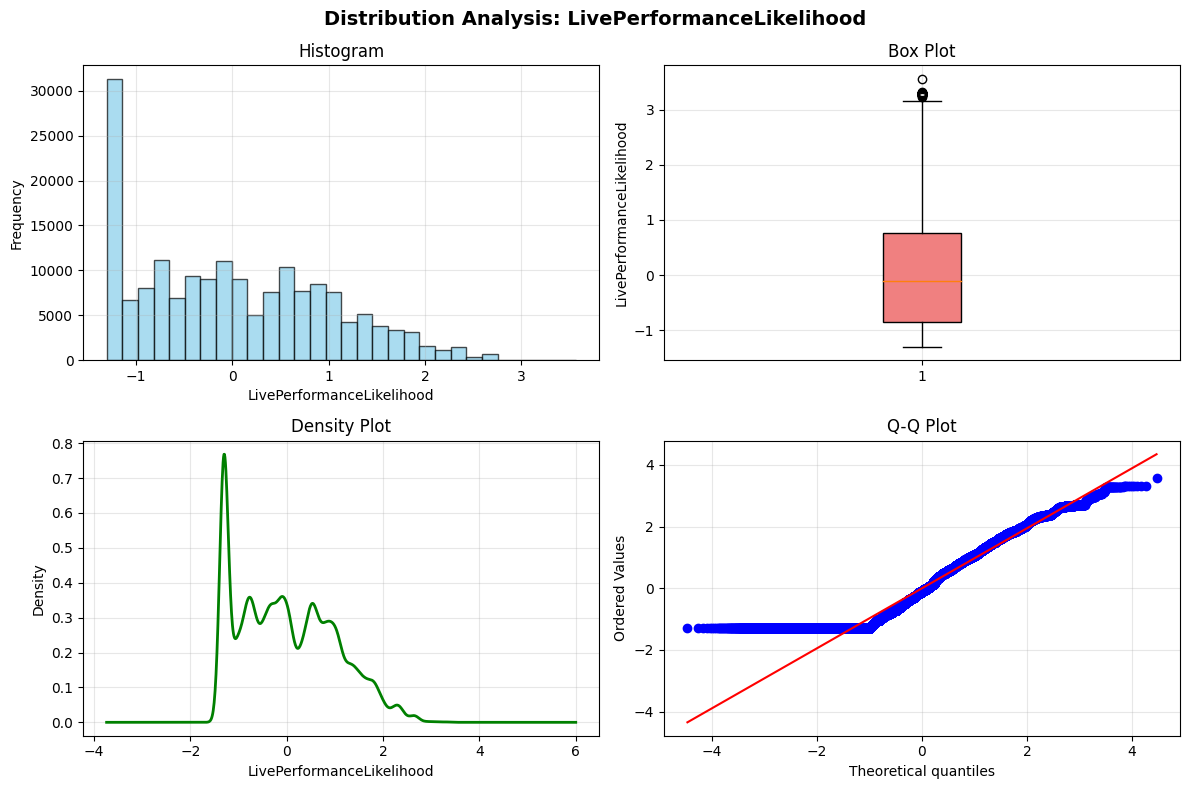


📊 Variable: MoodScore
Count: 174,722
Mean: 0.000
Median: 0.045
Std Dev: 1.000
Range: -2.344 to 1.866
Skewness: -0.274 (Approximately normal)
Kurtosis: -0.152
IQR Outliers: 0 (0.0%)
Z-score Outliers: 0 (0.0%)


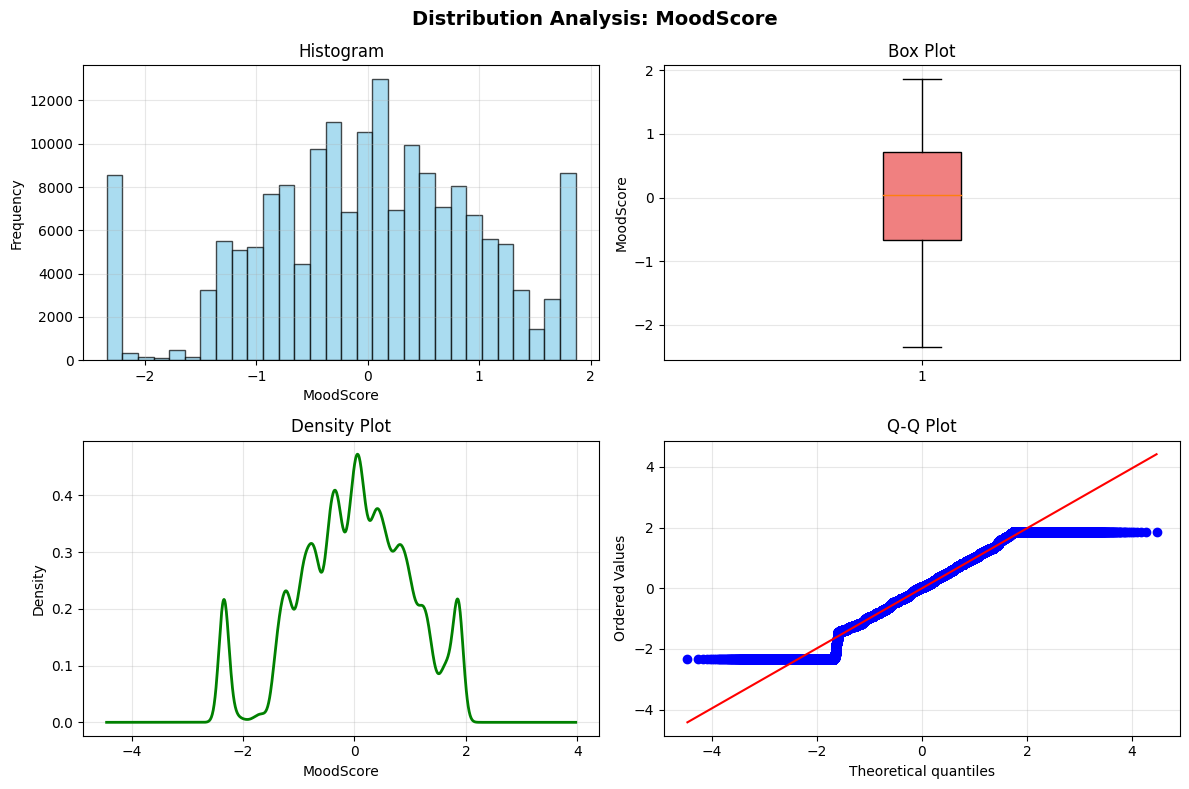


📊 Variable: TrackDurationMs
Count: 174,722
Mean: 0.000
Median: 0.031
Std Dev: 1.000
Range: -3.008 to 3.511
Skewness: -0.189 (Approximately normal)
Kurtosis: -0.131
IQR Outliers: 1397 (0.8%)
Z-score Outliers: 1222 (0.7%)


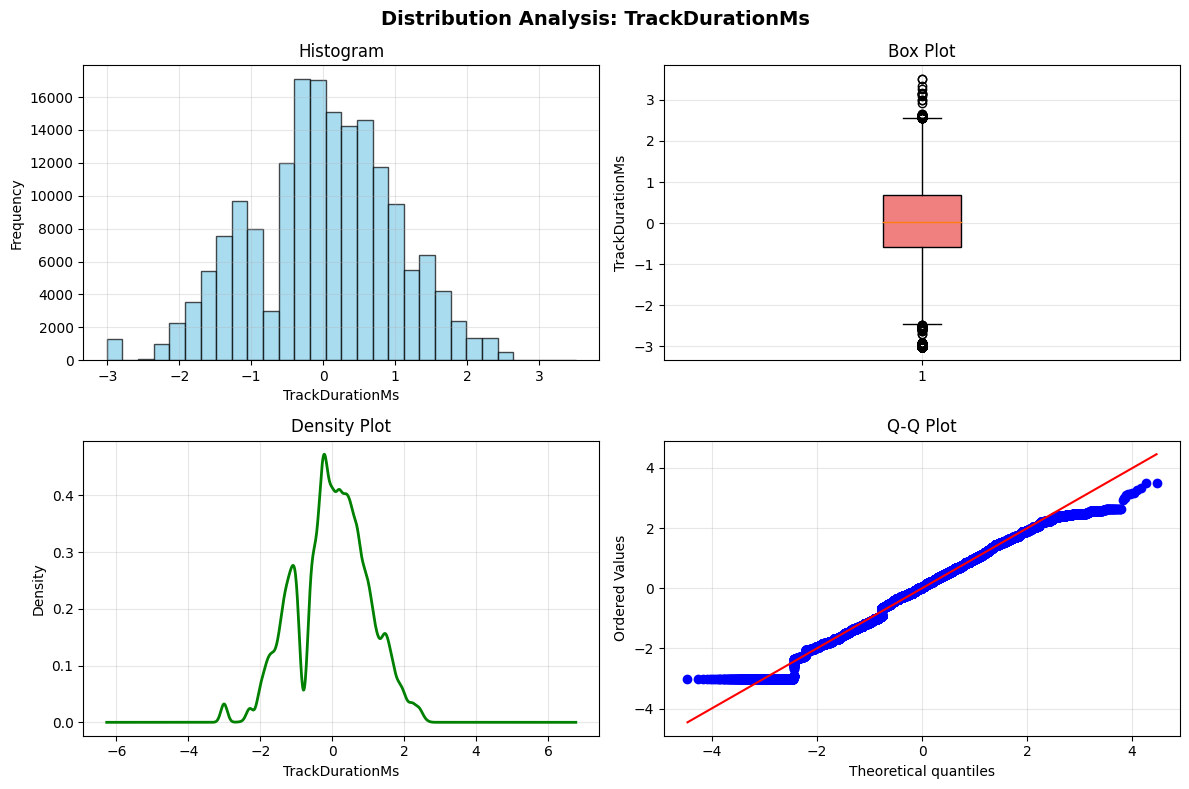


📊 Variable: Energy
Count: 174,722
Mean: -0.000
Median: 0.039
Std Dev: 1.000
Range: -1.723 to 1.719
Skewness: -0.033 (Approximately normal)
Kurtosis: -1.214
IQR Outliers: 0 (0.0%)
Z-score Outliers: 0 (0.0%)


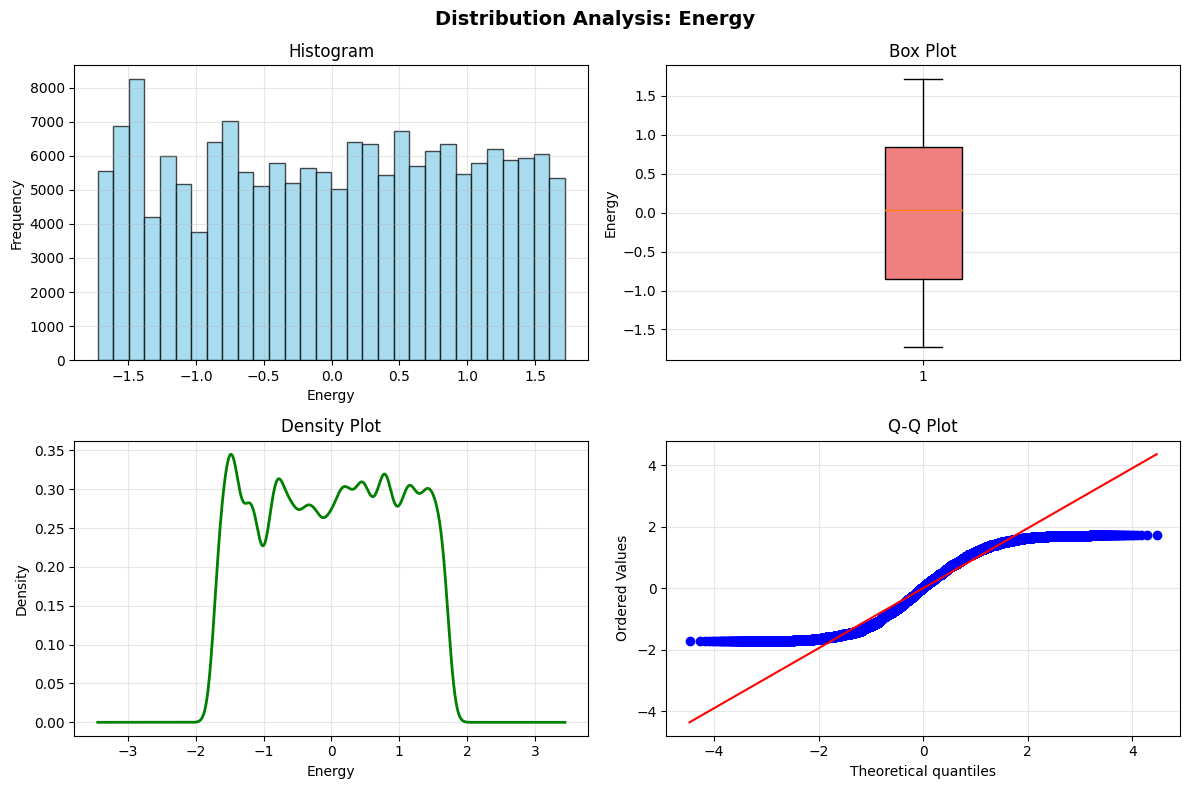

{'id': {'stats': {'count': 174722,
   'mean': 0.0,
   'median': 0.0,
   'std': 1.0000028617011418,
   'min': -1.7320408944162633,
   'max': 1.7320408944162633,
   'q25': -0.8660204472081316,
   'q75': 0.8660204472081316,
   'skewness': 8.328682225992246e-17,
   'kurtosis': -1.2},
  'iqr_outliers': Series([], Name: id, dtype: float64),
  'zscore_outliers': Series([], Name: id, dtype: float64),
  'iqr_bounds': (-3.4640817888325266, 3.4640817888325266)},
 'RhythmScore': {'stats': {'count': 174722,
   'mean': -1.346892515445938e-16,
   'median': 0.012492888621768235,
   'std': 1.000002861701104,
   'min': -3.127496139862229,
   'max': 2.1777738845366548,
   'q25': -0.748419357724943,
   'q75': 0.6779138234478037,
   'skewness': 0.16911747205889968,
   'kurtosis': -0.5291878588184655},
  'iqr_outliers': 27219   -3.127496
  Name: RhythmScore, dtype: float64,
  'zscore_outliers': 27219   -3.127496
  Name: RhythmScore, dtype: float64,
  'iqr_bounds': (-2.8879191294840627, 2.817413595206924)},


In [77]:
analyze_numerical_variables(test_scaled)

In [78]:
models = {
    "Huber Regressor": HuberRegressor(),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

In [80]:
for name, model in models.items():
    model.fit(X_train, y_train)


In [85]:
# 1. Predict on scaled test data
y_pred_huber = models["Huber Regressor"].predict(test_scaled)

# 2. (Optional) Save prediction

df_preds_huber = pd.DataFrame({
    'id': test['id'],
    'BeatsPerMinute': y_pred_huber,
    
})
df_preds_huber.to_csv("Huber_test_predictions.csv", index=False)

print("✅ Predictions saved to 'Huber_test_predictions.csv'")


✅ Predictions saved to 'Huber_test_predictions.csv'


In [86]:
# 1. Predict on scaled test data
y_pred_xgb = models["XGBoost"].predict(test_scaled)


df_preds_xgboost = pd.DataFrame({
    'id': test['id'],
   'BeatsPerMinute': y_pred_xgb
    
})
df_preds_xgboost.to_csv("XGboost_test_predictions.csv", index=False)

print("✅ Predictions saved to 'Xgboost_test_predictions.csv'")


✅ Predictions saved to 'Xgboost_test_predictions.csv'
